# BANK CUSTOMER CHURN PREDICTION USING ENSEMBLE - VARIOUS BOOSTING ALGORITHMS

## 1. IMPORTING THE PYTHON LIBRARIES

In [74]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz, export_text
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import graphviz
import pydotplus

from itertools import product

print("Python Libraries Import Completed")

Python Libraries Import Completed


## 2. LOADING THE RAW DATA FROM A CSV FILE

In [4]:
actual_raw_data = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhya/~~~VP_Data_Science/DS_Real_Time_Projects/Bank_Customers_Churn_Prediction_Using_Decision_Tree_Classifier_IDE_Algorithm/data/Bank_Churn_Raw_Data.csv")

print("Raw Data Import Completed")

Raw Data Import Completed


## 3. DATA EXPLORATION

In [5]:
# Verifying the shape of the data

actual_raw_data.shape

(10000, 14)

In [6]:
# Displaying the first 5 Rows of Data Instances

actual_raw_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
# Displaying the last 5 Rows of Data Instances

actual_raw_data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [8]:
# Verifying the Column Names in the Raw Data

actual_raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Verifying the Type of the Columns in the Raw Data

actual_raw_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# Verifying the Null Values in the Raw Data

actual_raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 4. DATA VISUALISATION

In [11]:
# Creating a New Data Frame To Include Only the Relevant Input Independent Variables and the Output Dependent Variable

raw_data = actual_raw_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                           'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                           'EstimatedSalary', 'Exited']]

raw_data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

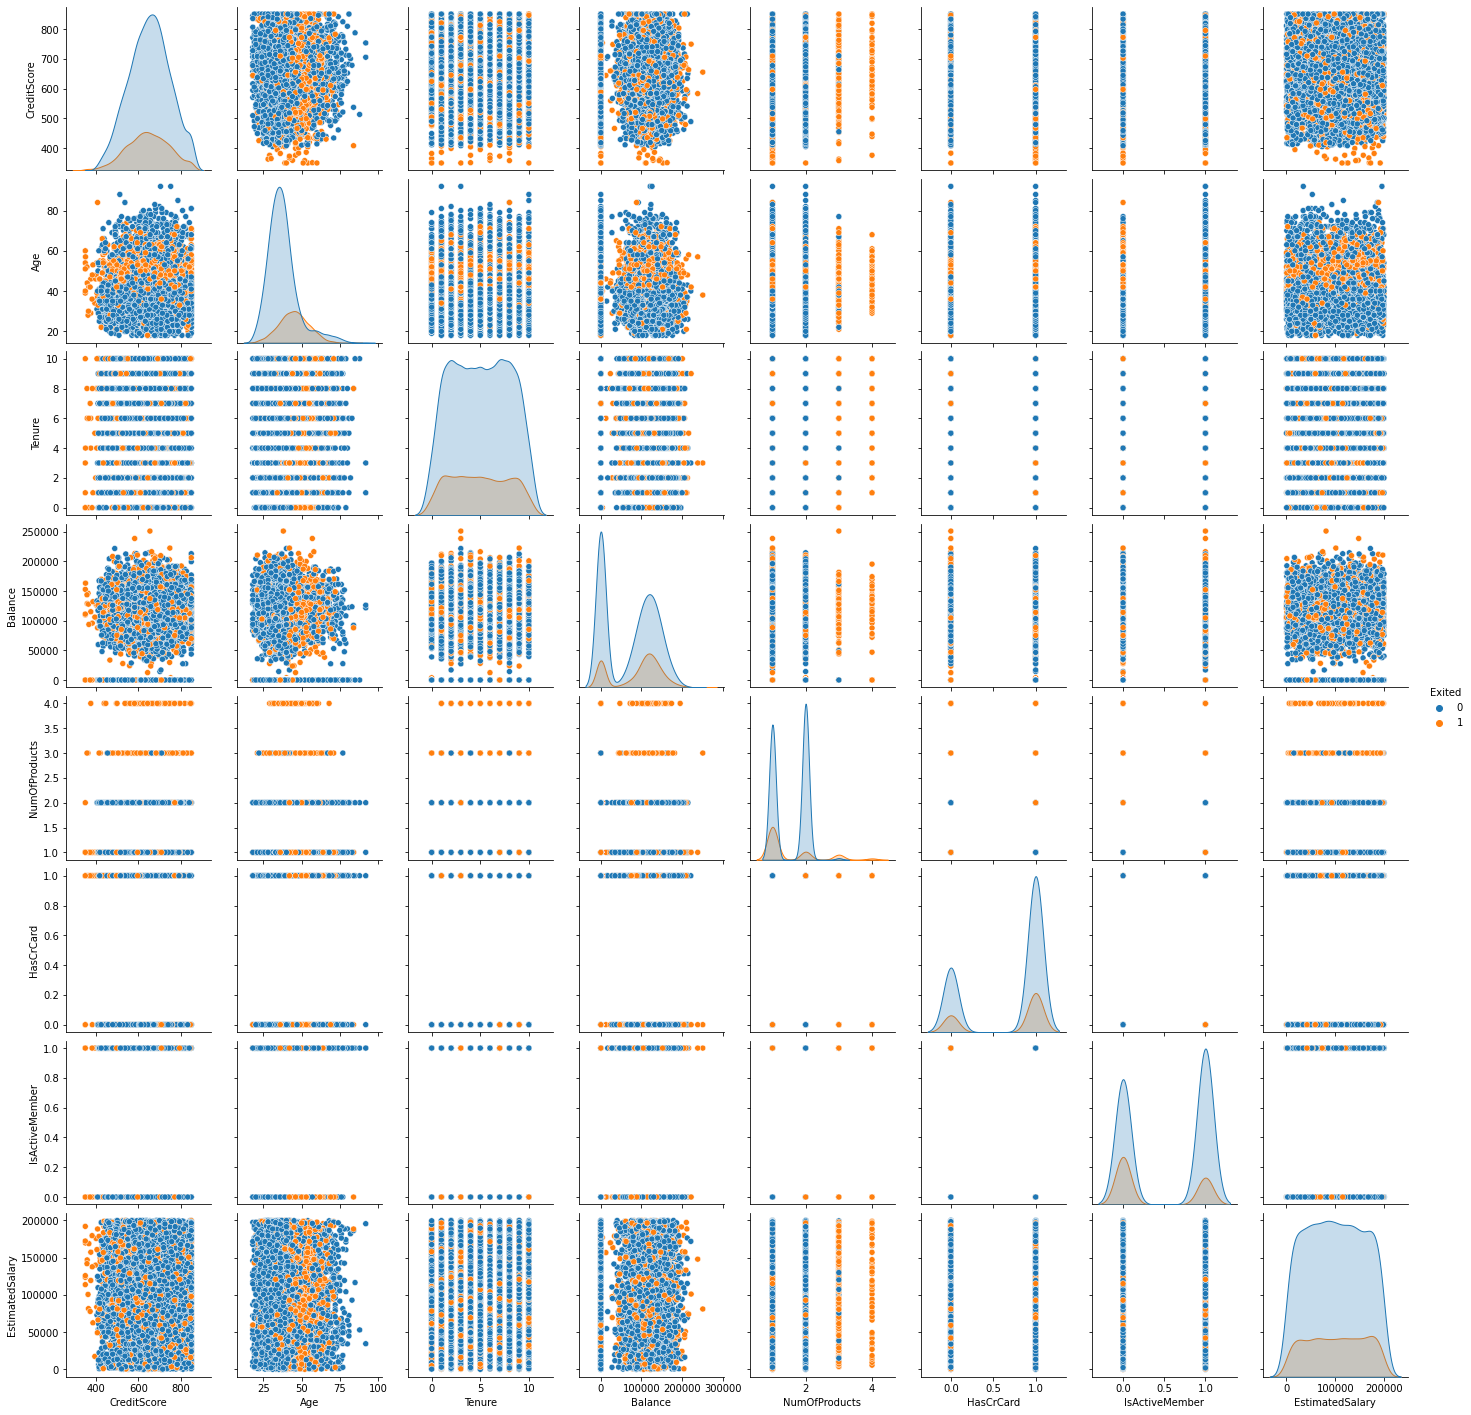

In [12]:
# Pair Plot - Visualising the Relationship Between The Variables

raw_data_graph = sns.pairplot(raw_data, hue='Exited', diag_kws={'bw_method':0.2})

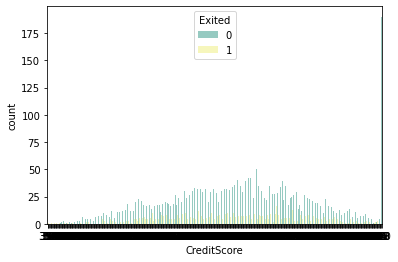

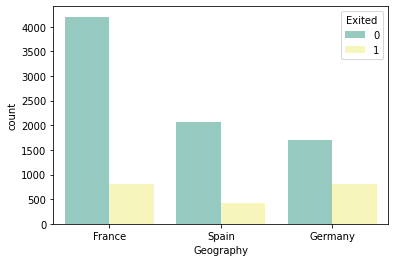

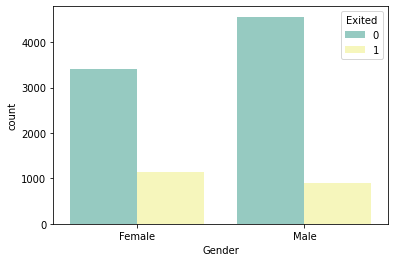

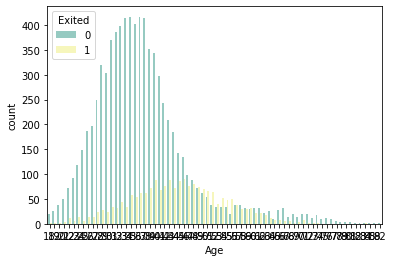

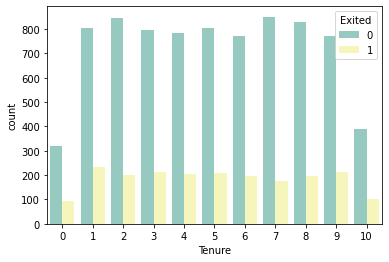

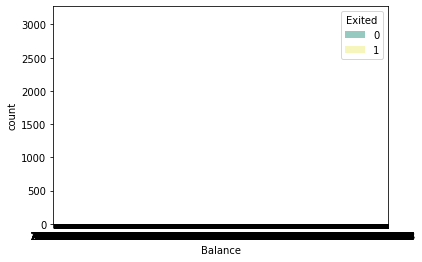

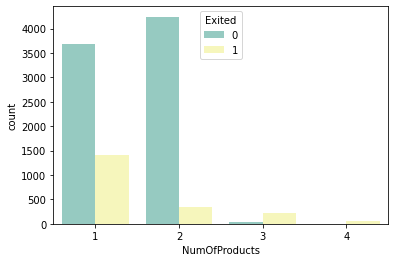

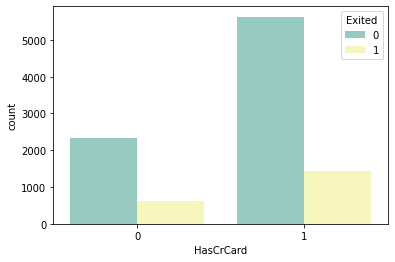

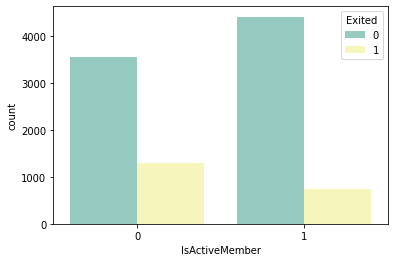

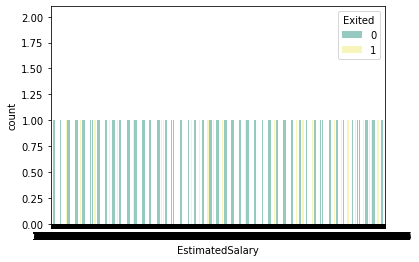

In [13]:
# Count Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

input_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary']

for feature in input_features:
    plt.figure()
    feature_count_plot = sns.countplot(x=feature, data=raw_data, hue='Exited', palette="Set3")

### Scatter Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

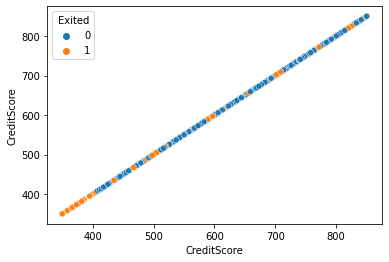

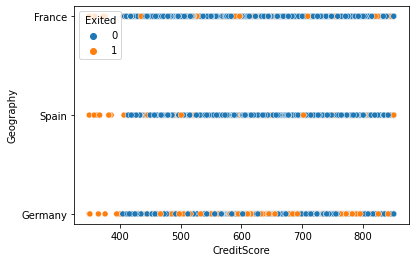

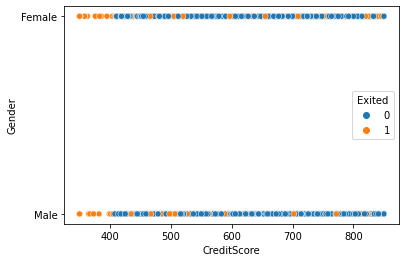

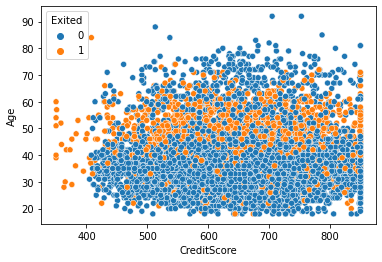

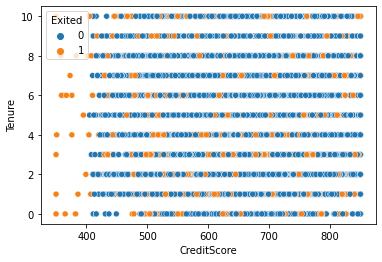

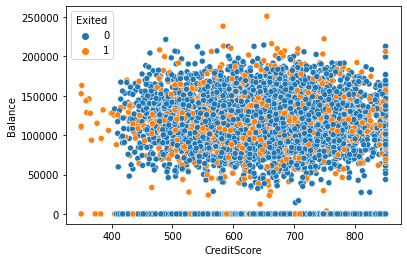

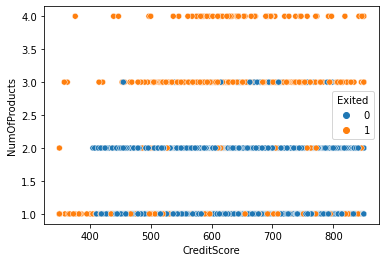

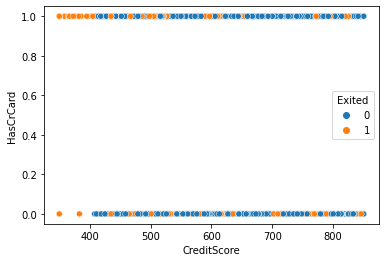

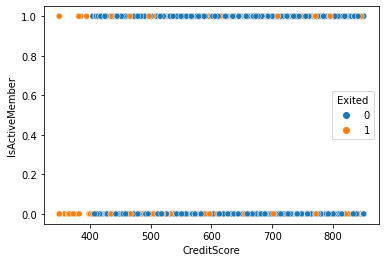

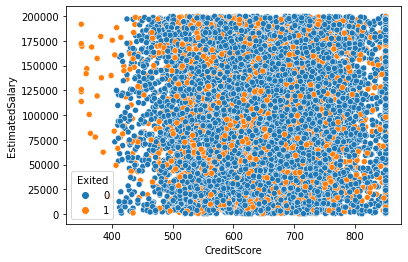

In [14]:
# Scatter Plot - Visualising the Relationship Between Each OF The Input Independent Variables and the Output Dependent Variable

input_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary']

# Input Variable 'CreditScore'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_1 = sns.scatterplot(data=raw_data, x='CreditScore', y=feature, hue='Exited')

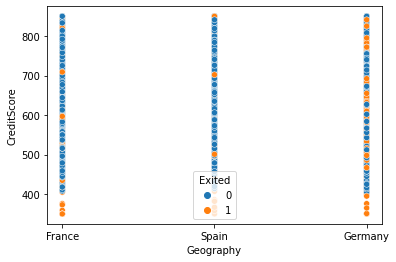

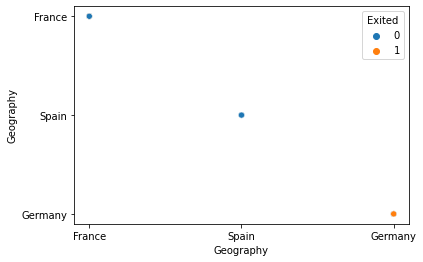

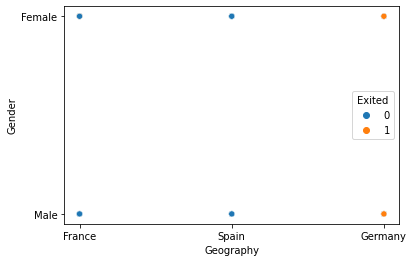

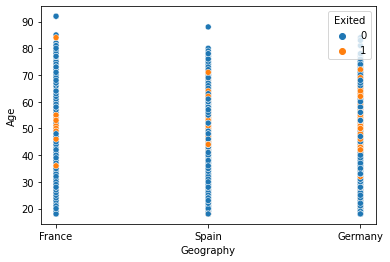

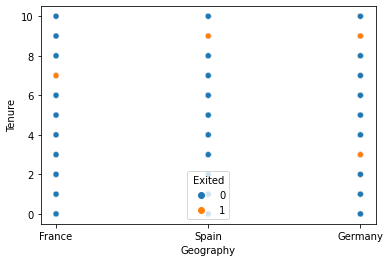

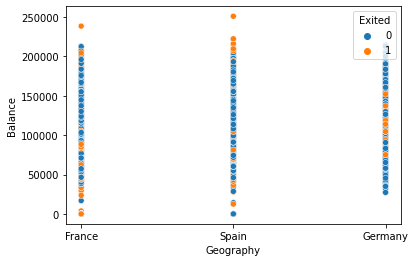

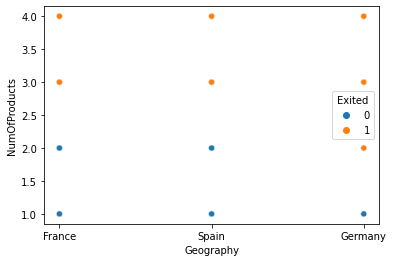

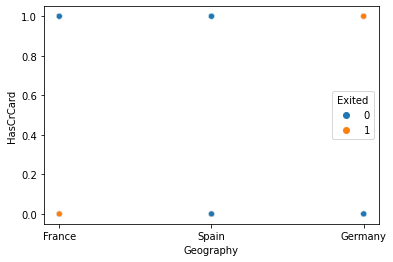

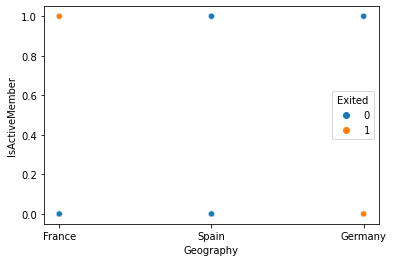

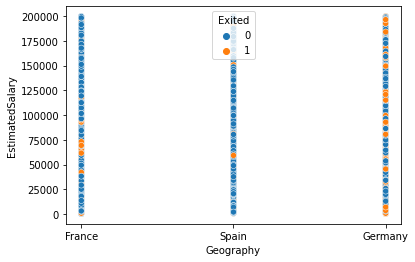

In [15]:
# Input Variable 'Geography'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_2 = sns.scatterplot(data=raw_data, x='Geography', y=feature, hue='Exited')

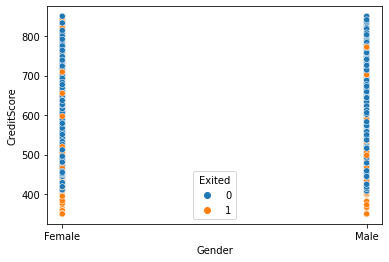

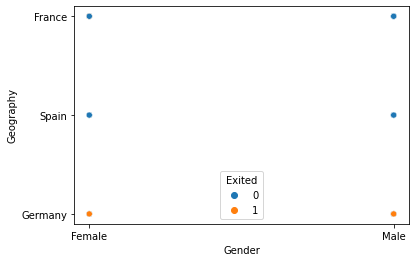

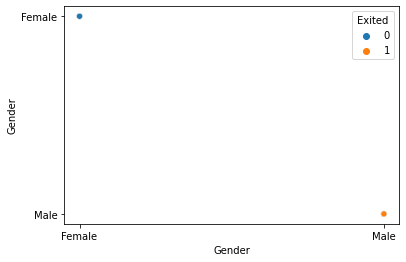

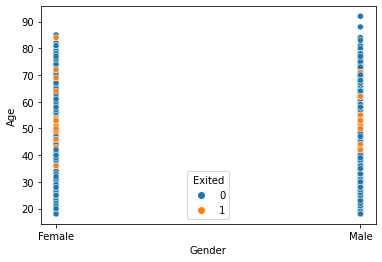

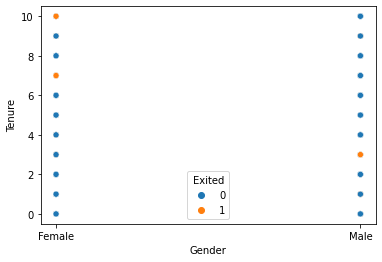

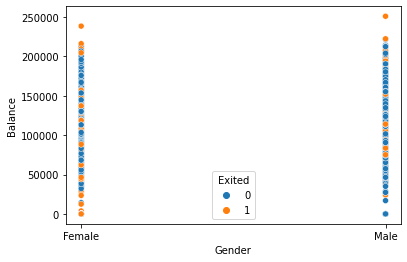

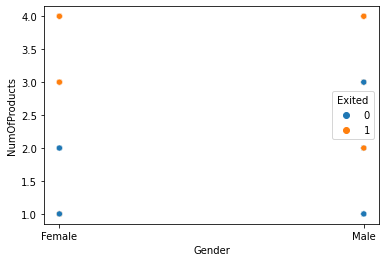

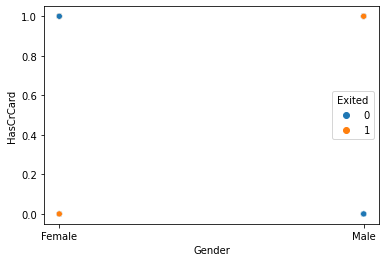

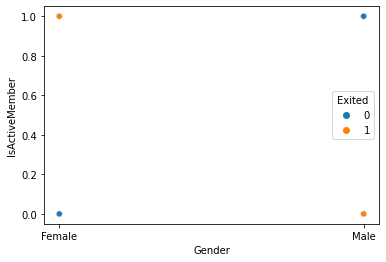

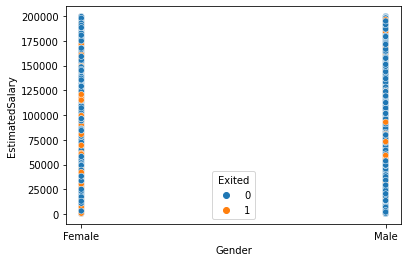

In [16]:
# Input Variable 'Gender'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_3 = sns.scatterplot(data=raw_data, x='Gender', y=feature, hue='Exited')

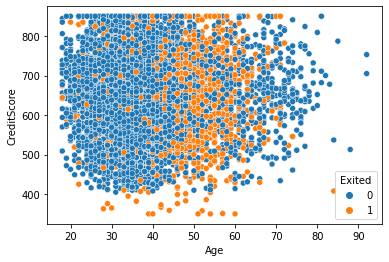

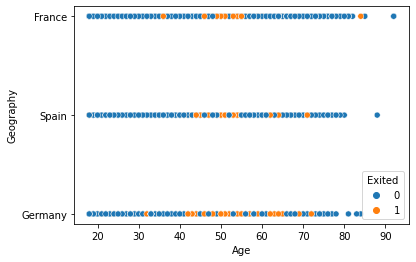

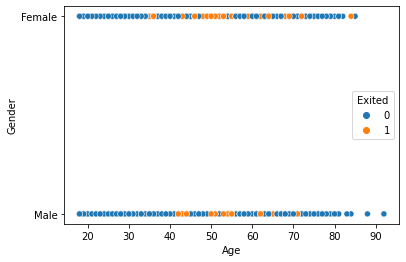

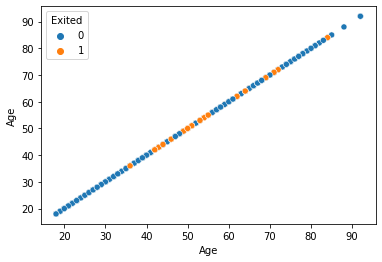

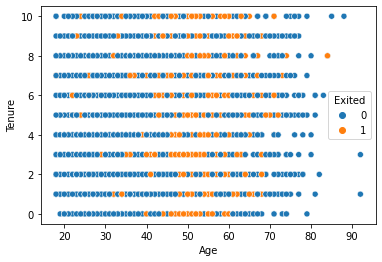

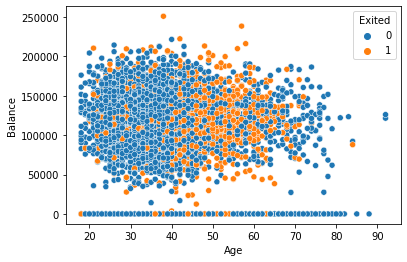

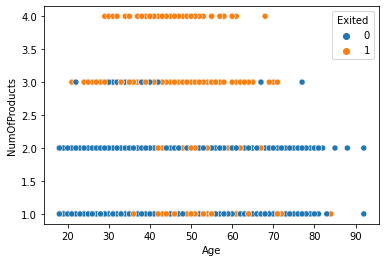

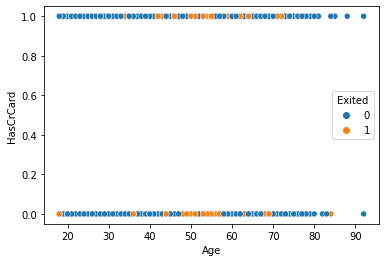

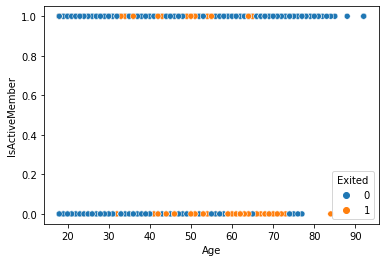

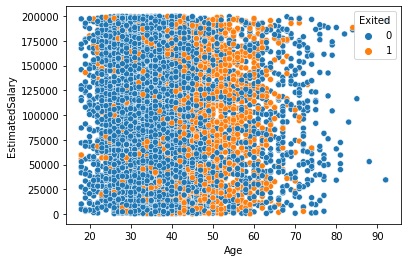

In [17]:
# Input Variable 'Age'

for feature in input_features:
    plt.figure() 
    feature_scatter_plot_4 = sns.scatterplot(data=raw_data, x='Age', y=feature, hue='Exited')

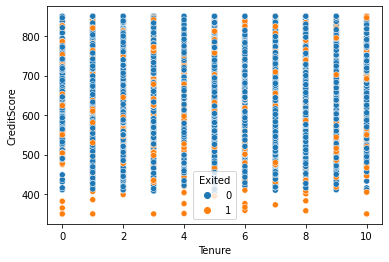

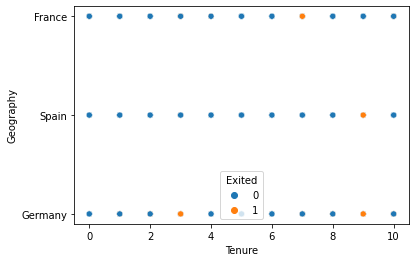

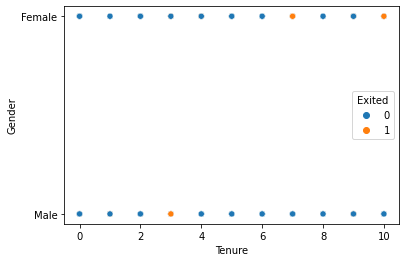

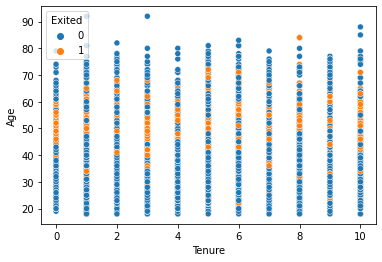

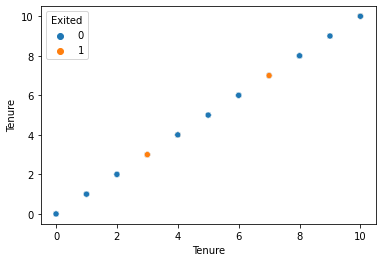

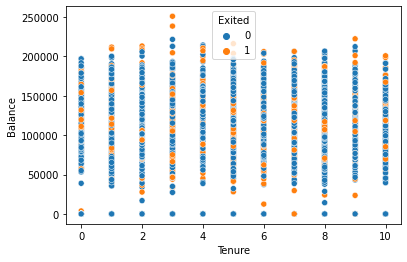

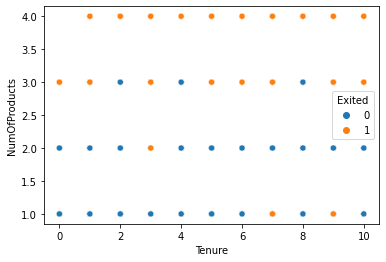

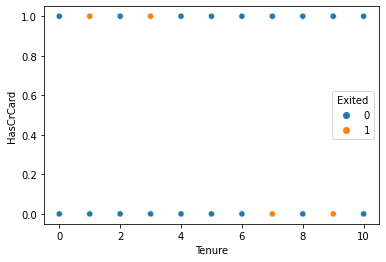

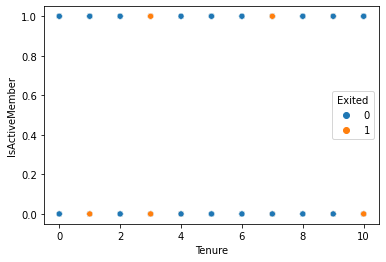

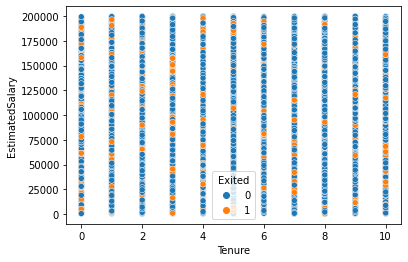

In [18]:
# Input Variable 'Tenure'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_5 = sns.scatterplot(data=raw_data, x='Tenure', y=feature, hue='Exited')

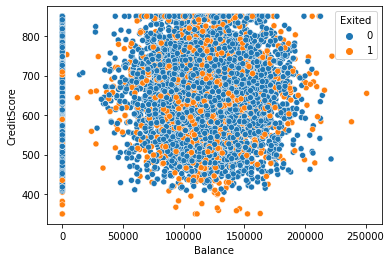

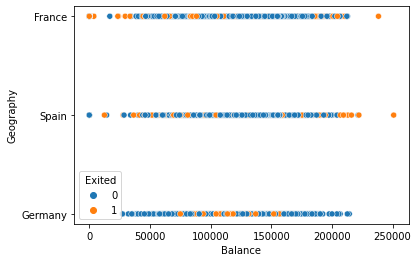

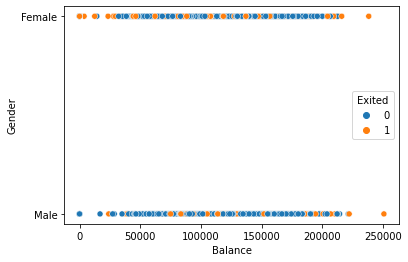

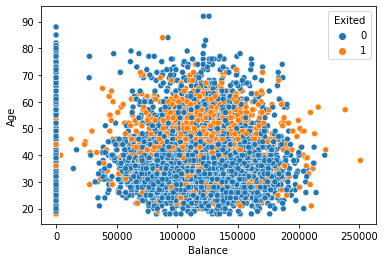

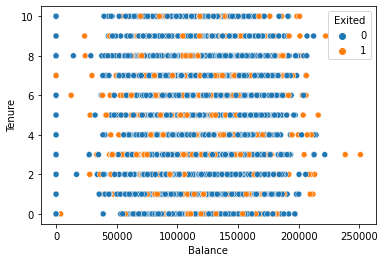

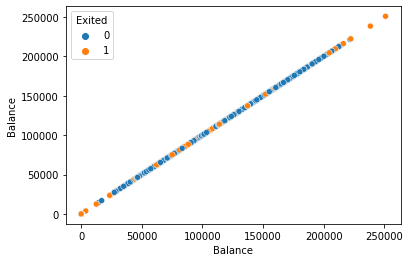

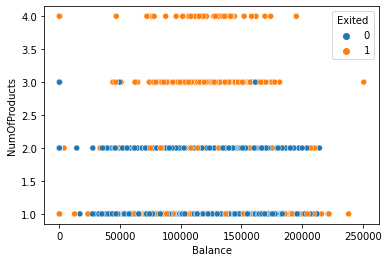

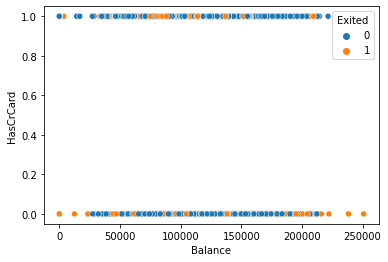

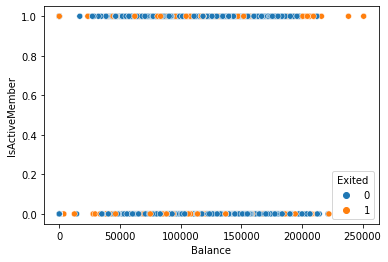

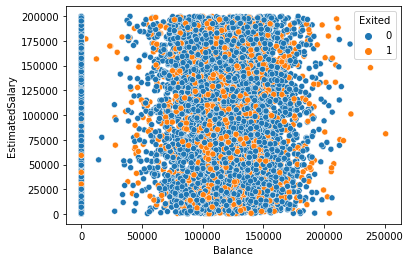

In [19]:
# Input Variable 'Balance'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_6 = sns.scatterplot(data=raw_data, x='Balance', y=feature, hue='Exited')

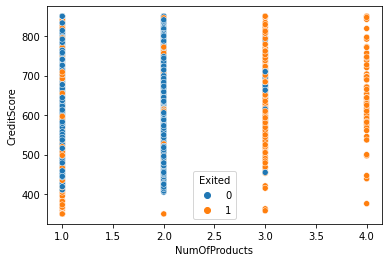

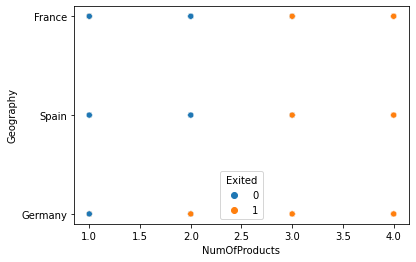

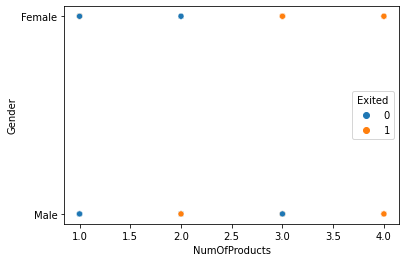

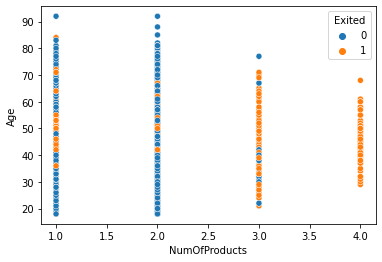

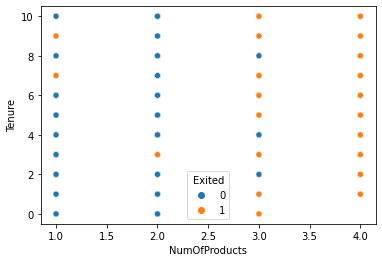

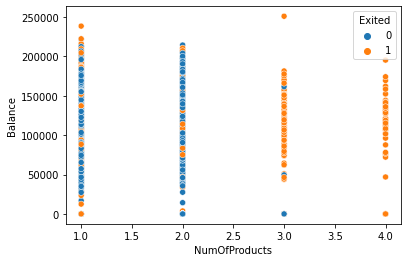

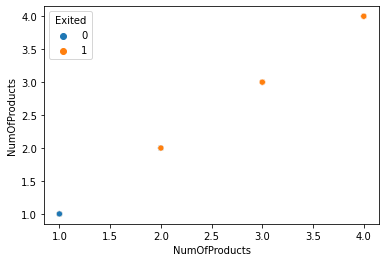

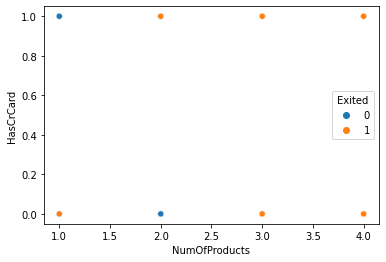

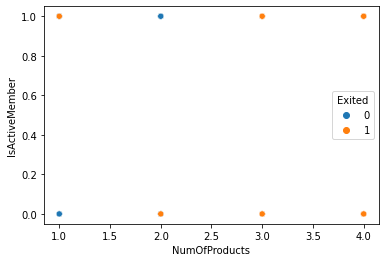

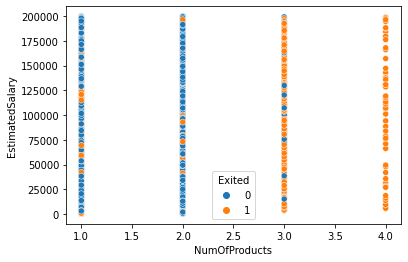

In [20]:
# Input Variable 'NumOfProducts'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_7 = sns.scatterplot(data=raw_data, x='NumOfProducts', y=feature, hue='Exited')

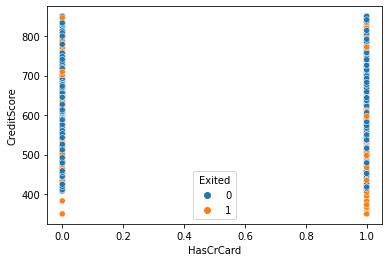

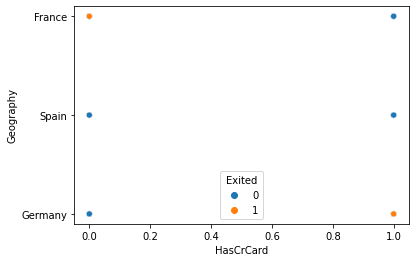

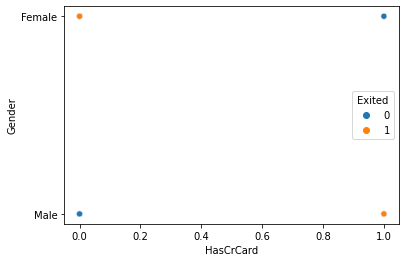

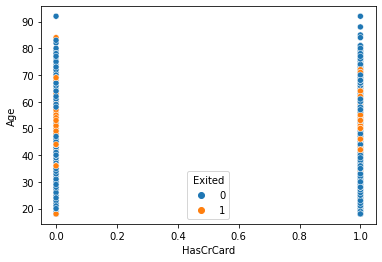

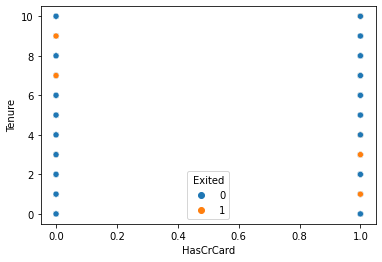

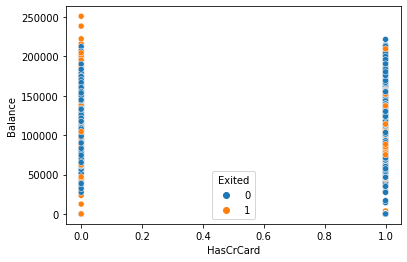

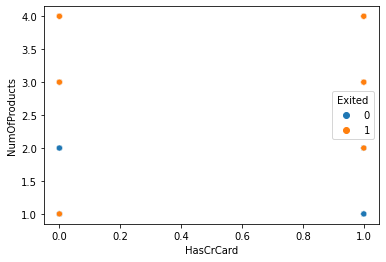

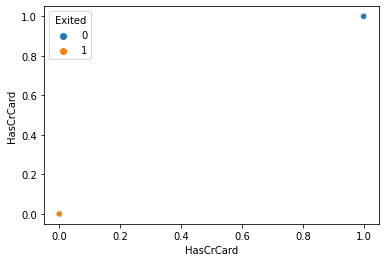

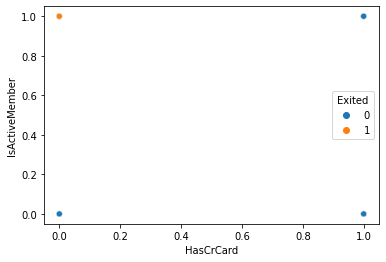

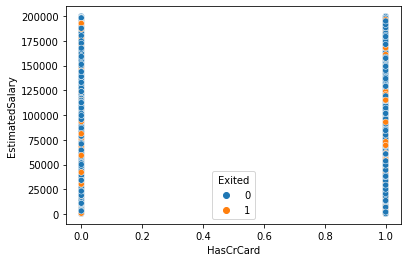

In [21]:
# Input Variable 'HasCrCard'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_8 = sns.scatterplot(data=raw_data, x='HasCrCard', y=feature, hue='Exited')

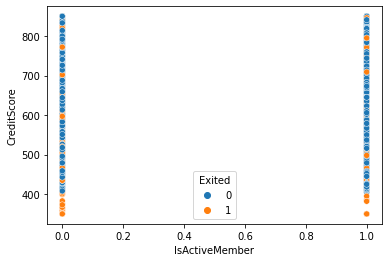

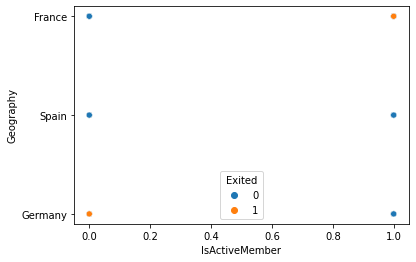

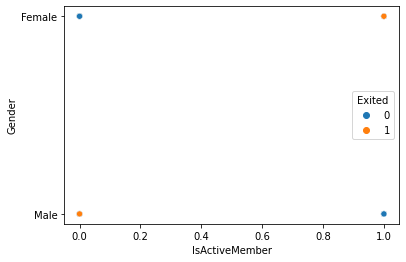

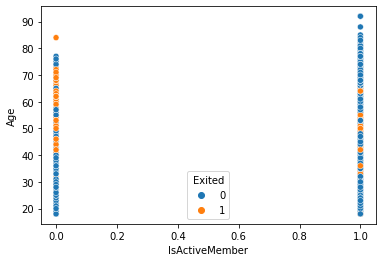

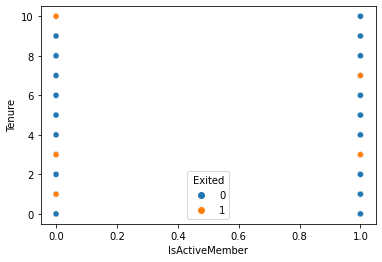

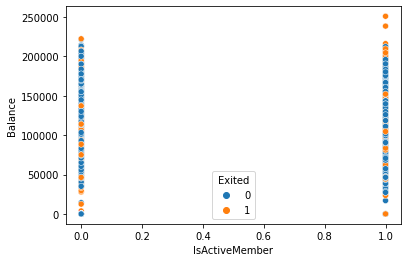

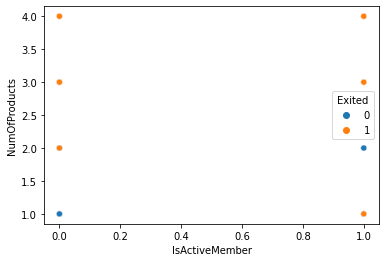

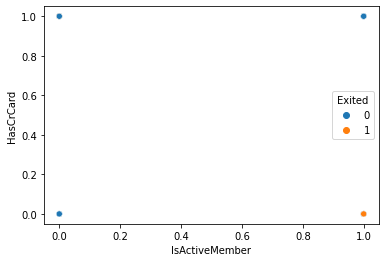

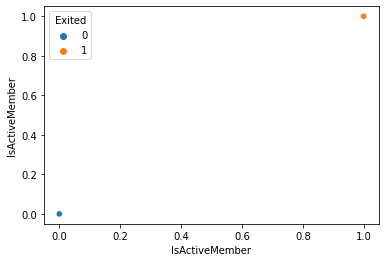

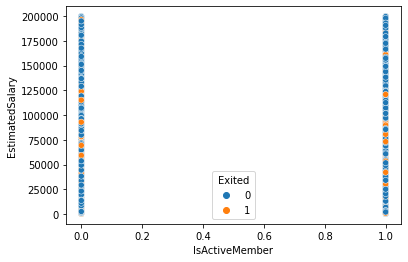

In [22]:
# Input Variable 'IsActiveMember'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_9 = sns.scatterplot(data=raw_data, x='IsActiveMember', y=feature, hue='Exited')

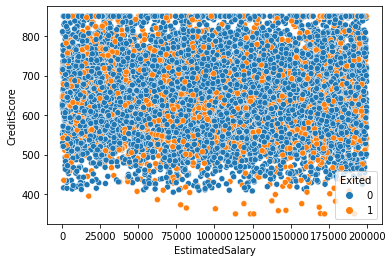

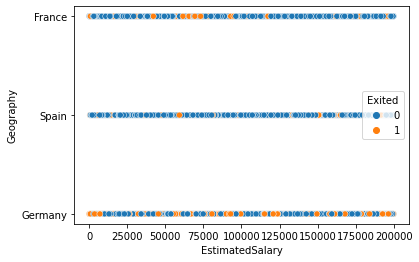

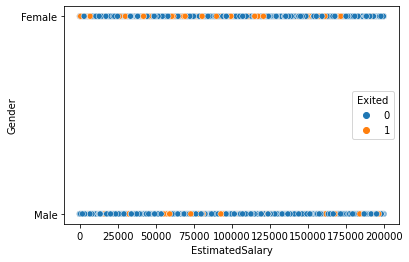

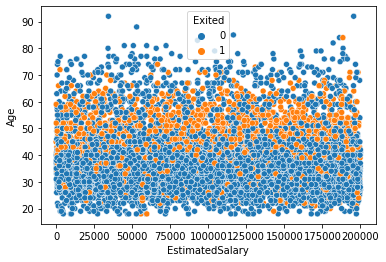

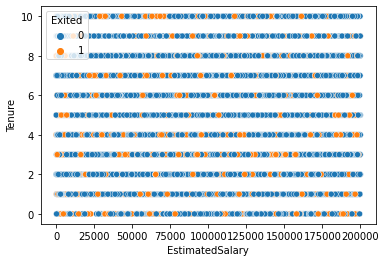

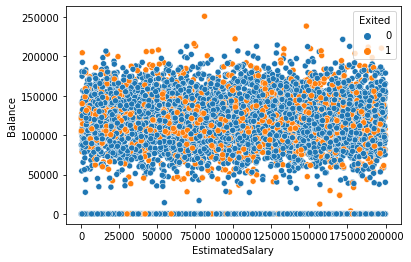

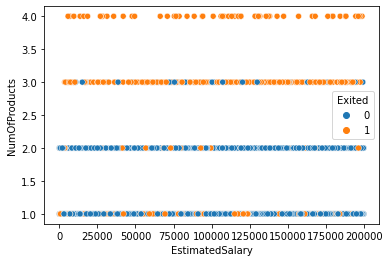

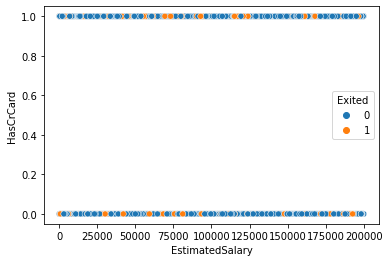

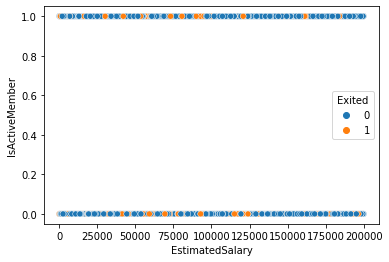

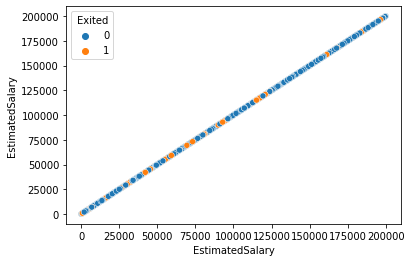

In [23]:
# Input Variable 'EstimatedSalary'

for feature in input_features:
    plt.figure()
    feature_scatter_plot_10 = sns.scatterplot(data=raw_data, x='EstimatedSalary', y=feature, hue='Exited')

## 5. DATA PRE-PROCESSING

In [24]:
# Converting the Categorical Variables into Numeric One-Hot Encoded Variables for Decision Tree IDE Model Training Purposes

raw_data_pp = pd.get_dummies(raw_data, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

print("Execution Completed")

Execution Completed


In [25]:
# Verifying the Columns of the Pre-processed Raw Data Frame after Applying One-Hot Encoding Method

raw_data_pp.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   Exited  Geography_France  Geography_Germany  Geography_Spain  \
0       1                 1                  0                0   
1       0                 0                  0                1   
2       1                 1                  0                0   
3       0                 1                  0                0   
4       0                 0                  0                1   

   Gender_Female  Gender_Male  HasCrCard_0  HasCrCard_1  IsActiveMember_0  \
0              1            0            0            1                 0   
1              1            0            1            0                 0   
2              1            0            0            1                 1   
3              1            0            1            0                 1   
4              1            0            0            1                 0   

   IsActiveMember_1  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1

In [26]:
# Verifying the Shape of the Pre-processed Raw Data Frame after Applying One-Hot Encoding Method

raw_data_pp.shape

(10000, 16)

In [27]:
# Normalising the Continuous Variables Columns to Scale to a Value Between 0 and 1 for Decision Tree IDE Model Training Purposes

norm_scale_features = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

norm_scale = MinMaxScaler()

raw_data_pp[norm_scale_features] = norm_scale.fit_transform(raw_data_pp[norm_scale_features])

print("Scaling is Completed")

Scaling is Completed


In [28]:
# Verifying all the Columns of the Final Pre-processed Raw Data Frame after Applying the Scaling Method

raw_data_pp.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  EstimatedSalary  \
0        0.538  0.324324       2  0.000000              1         0.506735   
1        0.516  0.310811       1  0.334031              1         0.562709   
2        0.304  0.324324       8  0.636357              3         0.569654   
3        0.698  0.283784       1  0.000000              2         0.469120   
4        1.000  0.337838       2  0.500246              1         0.395400   

   Exited  Geography_France  Geography_Germany  Geography_Spain  \
0       1                 1                  0                0   
1       0                 0                  0                1   
2       1                 1                  0                0   
3       0                 1                  0                0   
4       0                 0                  0                1   

   Gender_Female  Gender_Male  HasCrCard_0  HasCrCard_1  IsActiveMember_0  \
0              1            0            0            1                 0   
1              1            0            1            0                 0   
2              1            0            0            1                 1   
3              1            0            1            0                 1   
4              1            0            0            1                 0   

   IsActiveMember_1  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1

In [29]:
# Verifying the Shape of the Pre-processed Raw Data Frame after Applying the Scaling Method

raw_data_pp.shape

(10000, 16)

## 6. DATA SPLIT AS TRAIN DATA AND VALIDATION DATA

In [30]:
# Defining the Input and the Target Vectors for Decision Tree IDE Model Training Purposes

# Input (Independent) Features/Attributes
X = raw_data_pp.drop('Exited', axis=1).values

# Output (Dependent) Target Attribute
y = raw_data_pp['Exited'].values

print("Execution Completed")

Execution Completed


In [31]:
# Verifying the Shape of the Input and the Output Vectors

print("The Input Vector Shape is {}".format(X.shape))
print("The Output Vector Shape is {}".format(y.shape))

The Input Vector Shape is (10000, 15)
The Output Vector Shape is (10000,)


In [32]:
# Splitting the Data Between Train and Validation Data

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=1)

print("Execution Completed")

Execution Completed


In [33]:
# Verifying the Shape of the Train and the Validation Data

print("Input Train: {}".format(X_train.shape))
print("Output Train: {}\n".format(y_train.shape))
print("Input Validation: {}".format(X_validate.shape))
print("Output Validation: {}".format(y_validate.shape))

Input Train: (9000, 15)
Output Train: (9000,)

Input Validation: (1000, 15)
Output Validation: (1000,)


# I. ADAPTIVE BOOSTING ENSEMBLE CLASSIFIER ALGORITHM

## 7. TRAINING THE ENSEMBLE - ADAPTIVE BOOSTING CLASSIFIER ALGORITHM

In [46]:
# Defining the Parameters of the AdaBoostClassifier Model

base_estimator = DecisionTreeClassifier(max_depth=1, criterion='gini')
n_estimators = 50
learning_rate = 1.0
algorithm= 'SAMME.R'
random_state= None


# Creating an Instance of the AdaBoostClassifier Model
ada_boost_model = AdaBoostClassifier(base_estimator=base_estimator,
                                     n_estimators=n_estimators,
                                     learning_rate=learning_rate,
                                     algorithm=algorithm,
                                     random_state=random_state)

print("Model Training Started.....")

# Training the AdaBoostClassifier Model
ada_boost_model.fit(X_train, y_train)

print("Model Training Completed.....")

Model Training Started.....
Model Training Completed.....


## 8. DECISION STUMP GRAPHICAL REPRESENTATION AND VISUALISATION

### Method 1 : Visualising the Decision Stump using export_graphviz() Function

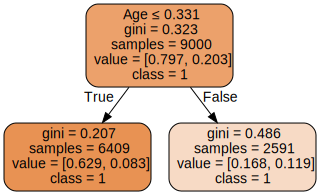

In [47]:
# Method 1 : Visualising the Decision Stump Using export_graphviz() Function

# Displaying the First Decision Stump at Index Position 0 in the Base Estimator

# Defining the Decision Stump Graph Data
graph_data = tree.export_graphviz(ada_boost_model.estimators_[0], out_file=None, 
                                  feature_names=raw_data_pp.drop('Exited', axis=1).columns,
                                  class_names=raw_data_pp['Exited'].unique().astype(str),
                                  filled=True, rounded=True, special_characters=True,
                                  impurity=True)

#graph_data

# Creating the Decision Stump for the Above Graph Data using Graphviz
decision_tree_graph = graphviz.Source(graph_data)

# Visualising the Decision Stump
decision_tree_graph

### Method 2 : Visualising the Decision Stump using graph_from_dot_data() Function

In [48]:
# Method 2 : Visualising the Decision Stump Using graph_from_dot_data() Function

# Displaying the Second Decision Stump at Index Position 1 in the Base Estimator

# Defining the Decision Stump Graph Data
graph_data = tree.export_graphviz(ada_boost_model.estimators_[1], out_file=None, 
                                  feature_names=raw_data_pp.drop('Exited', axis=1).columns,
                                  class_names=raw_data_pp['Exited'].unique().astype(str),
                                  filled=True, rounded=True, special_characters=True,
                                  impurity=True)

#graph_data


# Creating the Decision Stump for the Above Graph Data using pydotplus
pydot_graph = pydotplus.graph_from_dot_data(graph_data)
pydot_graph.write_png('Original_Decision_Tree.png')
pydot_graph.set_size('"8,8!"')
pydot_graph.write_png('Resized_Decision_Tree.png')

pydot_graph

print("Execution Completed")

Execution Completed


### Method 3 : Visualising the Decision Tree using plot_tree() Function

[Text(167.4, 163.07999999999998, 'Age <= 0.331\ngini = 0.5\nsamples = 9000\nvalue = [0.5, 0.5]\nclass = 1'),
 Text(83.7, 54.360000000000014, 'gini = 0.5\nsamples = 6409\nvalue = [0.313, 0.323]\nclass = 0'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 2591\nvalue = [0.187, 0.177]\nclass = 1')]

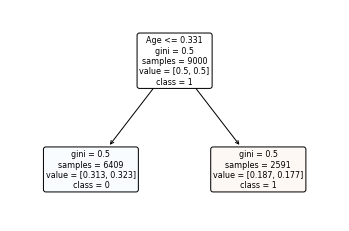

In [49]:
# Method 3 : Visualising the Decision Stump Using plot_tree() Function

# Displaying the 50th Decision Stump at Index Position 49 in the Base Estimator

# Defining the Decision Stump Graph Data
decision_tree_graph = tree.plot_tree(ada_boost_model.estimators_[49], feature_names=raw_data_pp.drop('Exited', axis=1).columns,
                                     class_names=raw_data_pp['Exited'].unique().astype(str),
                                     filled=True, rounded=True, fontsize=8)

# Visualising the Decision Stump
decision_tree_graph

In [50]:
# Creating a List of all the Input Features

features = raw_data_pp.drop('Exited', axis=1).columns
feature_names = []
for feature in features:
    feature_names.append(feature)
feature_names

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'HasCrCard_0',
 'HasCrCard_1',
 'IsActiveMember_0',
 'IsActiveMember_1']

### Method 4 : Visualising the Decision Tree in Text Format using export_text() Function

In [51]:
# Method 4 : Visualising the Decision Stump in Text Format using export_text() Function

# Displaying the 25th Decision Stump at Index Position 24 in the Base Estimator

# Creating a List of Input Feature Names
features = raw_data_pp.drop('Exited', axis=1).columns
feature_names_list = []
for feature in features:
    feature_names_list.append(feature)

# Defining the Decision Stump Textual Representation Data
decision_tree_text = tree.export_text(ada_boost_model.estimators_[24], feature_names=feature_names_list,
                                      spacing=4)

# Visualising the Decision Stump in the Textual Format
print(decision_tree_text)

|---- Tenure <= 0.50
|    |---- class: 1
|---- Tenure >  0.50
|    |---- class: 0



## 9. RETRIEVING THE FEATURE IMPORTANCE VALUES OF THE INPUT FEATURES

In [52]:
# Retrieving the Information Gain i.e.; Feature Importance Values of the Input Features

# Creating an Empty Data Frame to Hold the Feature Name and the Feature's Importance Values
ig_df_final = pd.DataFrame()

# Looping Through Each and Every Input Feature and Retrieving the Feature Importance Value for Each Feature
for feature, column in enumerate(raw_data_pp.drop('Exited', axis=1)):
    print("{} - {}".format(column, ada_boost_model.feature_importances_[feature]))
    
    # Creating a Data Frame to Include the Feature Name and the Corresponding Feature Importance Value
    ig_df = pd.DataFrame({'Feature': [column], 'Feature Importance': [ada_boost_model.feature_importances_[feature]]})
    
    # Concatenating the Individual Feature Data Frame with the Final Data Frame
    ig_df_final = pd.concat([ig_df_final, ig_df], axis=0, ignore_index=True)
    
# Ordering the Feature Importance Values in the Increasing Order of Importance
ig_df_final_sorted = ig_df_final.sort_values(by='Feature Importance', ascending=False).reset_index(drop=True)
    
ig_df_final_sorted

CreditScore - 0.12
Age - 0.4
Tenure - 0.02
Balance - 0.18
NumOfProducts - 0.08
EstimatedSalary - 0.14
Geography_France - 0.0
Geography_Germany - 0.02
Geography_Spain - 0.0
Gender_Female - 0.02
Gender_Male - 0.0
HasCrCard_0 - 0.0
HasCrCard_1 - 0.0
IsActiveMember_0 - 0.02
IsActiveMember_1 - 0.0


Feature  Feature Importance
0                 Age                0.40
1             Balance                0.18
2     EstimatedSalary                0.14
3         CreditScore                0.12
4       NumOfProducts                0.08
5              Tenure                0.02
6   Geography_Germany                0.02
7       Gender_Female                0.02
8    IsActiveMember_0                0.02
9    Geography_France                0.00
10    Geography_Spain                0.00
11        Gender_Male                0.00
12        HasCrCard_0                0.00
13        HasCrCard_1                0.00
14   IsActiveMember_1                0.00

## 10. CALCULATING AND COMPARING THE TRAINING AND VALIDATION ACCURACY

In [53]:
# Accuracy on the Train Data
print("Training Accuracy: ", ada_boost_model.score(X_train, y_train))

# Accuracy on the Validation Data
print("Validation Accuracy: ", ada_boost_model.score(X_validate, y_validate))

Training Accuracy:  0.8605555555555555
Validation Accuracy:  0.848


## 11. VALIDATING THE CLASSIFIER RESULTS ON THE VALIDATION DATA

In [54]:
# Validating the Classifier Results on the Validation Data

y_validate_pred = ada_boost_model.predict(X_validate)

y_validate_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## 12. COMPARING THE VALIDATION ACTUALS WITH THE VALIDATION PREDICTIONS

In [56]:
# Comparing the Validation Predictions with the Validation Actuals for the first 20 Data Instances

# Validation Actuals
print(y_validate[:20])

# Validation Predictions
print(y_validate_pred[:20])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


## 13. CONFUSION MATRIX BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [57]:
# Defining the Instance of Confusion Matrix
cm_validation_matrix = confusion_matrix(y_validate, y_validate_pred)

print("Execution Completed")

Execution Completed


## Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function

<AxesSubplot:>

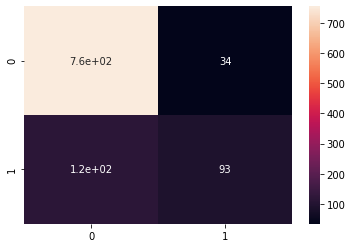

In [58]:
# Method 1 : Plotting the Confusion Matrix with Numeric Values using Seaborn heatmap() Function

churn_cm_plot_1 = sns.heatmap(cm_validation_matrix, annot=True)
churn_cm_plot_1

## Method 2 : Plotting the Confusion Matrix with Percentage Values using Seaborn heatmap() Function

<AxesSubplot:>

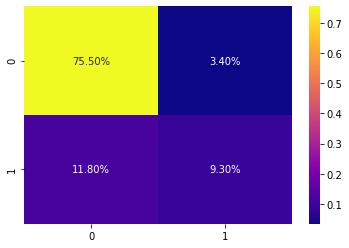

In [59]:
# Method 2 : Plotting the Confusion Matrix with Percentage Values Rounded-off to 2 Decimal Places using Seaborn heatmap() Function

churn_cm_plot_2 = sns.heatmap(cm_validation_matrix/np.sum(cm_validation_matrix), annot=True, fmt='0.2%', cmap='plasma')
churn_cm_plot_2

## Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function

<AxesSubplot:>

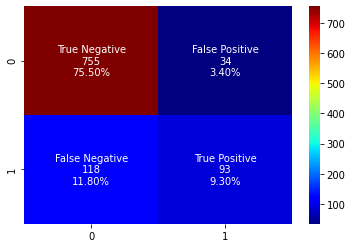

In [60]:
# Method 3 : Plotting the Confusion Matrix with Numeric Values, Percentage Values and the Corresponding Text using Seaborn heatmap() Function

cm_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

cm_counts = ["{0:0.0f}".format(value) for value in cm_validation_matrix.flatten()]

cm_percentages = ["{0:0.2%}".format(value) for value in cm_validation_matrix.flatten()/np.sum(cm_validation_matrix)]

cm_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(cm_names,cm_counts,cm_percentages)]

cm_labels = np.asarray(cm_labels).reshape(2,2)

sns.heatmap(cm_validation_matrix, annot=cm_labels, fmt='', cmap='jet')

## 14. CLASSIFICATION REPORT BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [61]:
# Classification Report and Metrics between the Validation Actuals and the Validation Predictions

target_names = ['No Churn', 'Churn']

# Defining the Classification Report for the Validation Data
classification_report_validation = classification_report(y_validate, y_validate_pred, target_names=target_names)

# Displaying the Classification Report
print(classification_report_validation)

              precision    recall  f1-score   support

    No Churn       0.86      0.96      0.91       789
       Churn       0.73      0.44      0.55       211

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.83      1000



## 15. INDIVIDUAL CLASSIFIER METRICS BETWEEN THE VALIDATION ACTUALS AND THE VALIDATION PREDICTIONS

In [62]:
# Individual Classifier Metrics between the Validation Actuals and the Validation Predictions

# Accuracy
churn_accuracy = round((accuracy_score(y_validate, y_validate_pred))*100, 2)

# F1-score
churn_f1_score = round((f1_score(y_validate, y_validate_pred)*100), 2)

# Precision
churn_precision = round((precision_score(y_validate, y_validate_pred)*100), 2)

# Recall
churn_recall = round((recall_score(y_validate, y_validate_pred)*100), 2)

# ROC AUC Score
churn_roc_auc_score = round((roc_auc_score(y_validate, y_validate_pred)*100), 2)

print("Customer Churn Classifier - Accuracy: {}%".format(churn_accuracy))
print("Customer Churn Classifier - F1-Score: {}%".format(churn_f1_score))
print("Customer Churn Classifier - Precision: {}%".format(churn_precision))
print("Customer Churn Classifier - Recall: {}%".format(churn_recall))
print("Customer Churn Classifier - ROC AUC Score: {}%".format(churn_roc_auc_score))

Customer Churn Classifier - Accuracy: 84.8%
Customer Churn Classifier - F1-Score: 55.03%
Customer Churn Classifier - Precision: 73.23%
Customer Churn Classifier - Recall: 44.08%
Customer Churn Classifier - ROC AUC Score: 69.88%


## 16. TUNING THE HYPER-PARAMETERS OF THE RANDOM FOREST CLASSIFIER

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1, criterion='gini')
n_estimators = 50
learning_rate = 1.0
algorithm= 'SAMME.R'
random_state= None


# Creating an Instance of the AdaBoostClassifier Model
ada_boost_model = AdaBoostClassifier(base_estimator=base_estimator,
                                     n_estimators=n_estimators,
                                     learning_rate=learning_rate,
                                     algorithm=algorithm,
                                     random_state=random_state)

 
 Scenario 1 - n_estimators: 50, learning_rate: 0.1, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 80.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


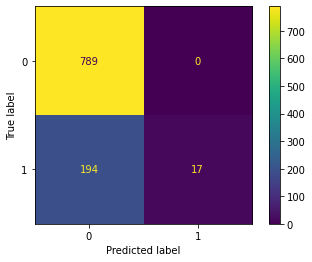

 
 Scenario 2 - n_estimators: 50, learning_rate: 0.1, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 80.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


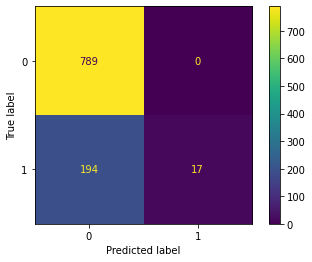

 
 Scenario 3 - n_estimators: 50, learning_rate: 0.1, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 82.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


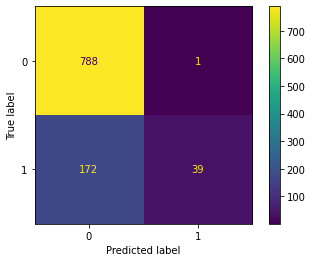

 
 Scenario 4 - n_estimators: 50, learning_rate: 0.1, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 82.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


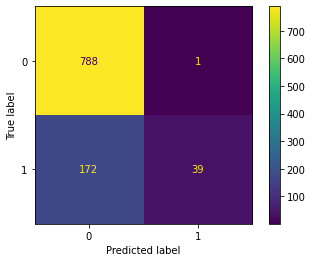

 
 Scenario 5 - n_estimators: 50, learning_rate: 0.2, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 80.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


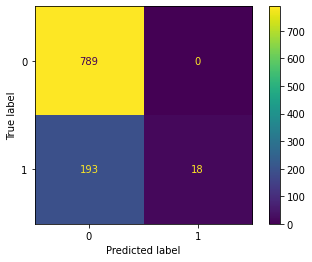

 
 Scenario 6 - n_estimators: 50, learning_rate: 0.2, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 80.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


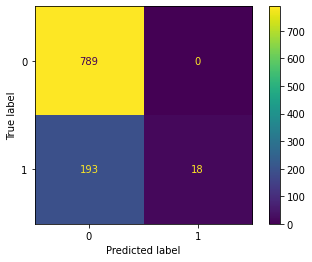

 
 Scenario 7 - n_estimators: 50, learning_rate: 0.2, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


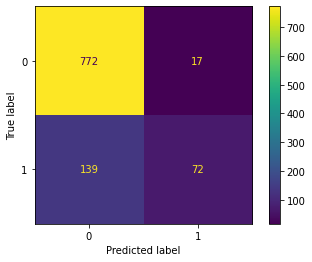

 
 Scenario 8 - n_estimators: 50, learning_rate: 0.2, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


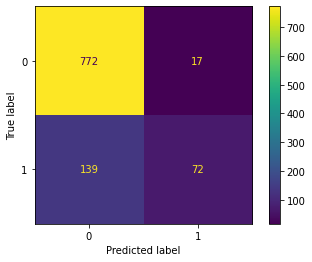

 
 Scenario 9 - n_estimators: 50, learning_rate: 0.3, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 82.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


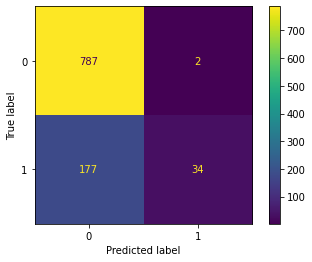

 
 Scenario 10 - n_estimators: 50, learning_rate: 0.3, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 82.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


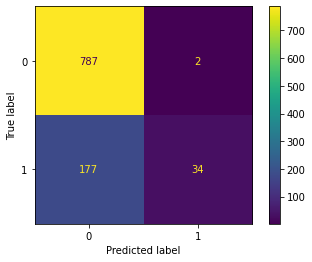

 
 Scenario 11 - n_estimators: 50, learning_rate: 0.3, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


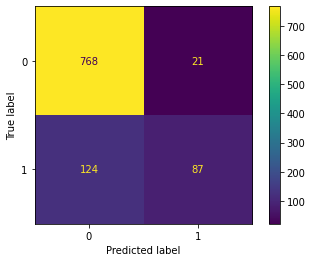

 
 Scenario 12 - n_estimators: 50, learning_rate: 0.3, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


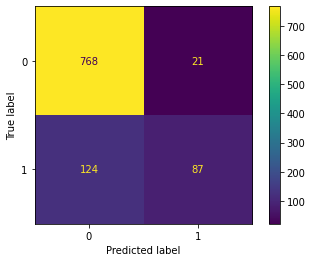

 
 Scenario 13 - n_estimators: 50, learning_rate: 0.4, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


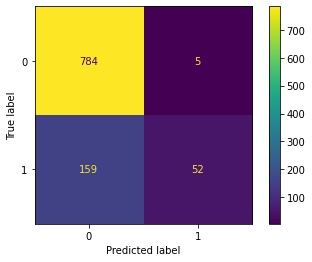

 
 Scenario 14 - n_estimators: 50, learning_rate: 0.4, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


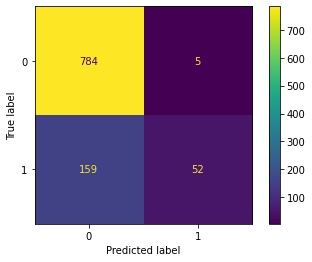

 
 Scenario 15 - n_estimators: 50, learning_rate: 0.4, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


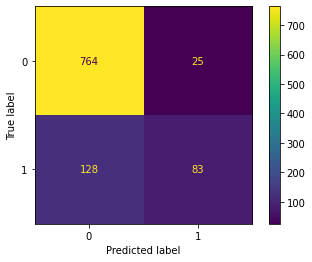

 
 Scenario 16 - n_estimators: 50, learning_rate: 0.4, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


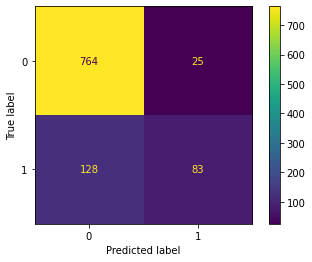

 
 Scenario 17 - n_estimators: 50, learning_rate: 0.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


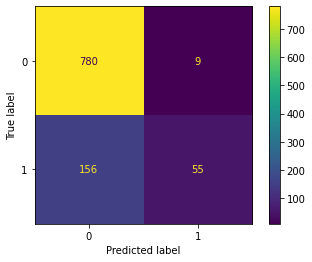

 
 Scenario 18 - n_estimators: 50, learning_rate: 0.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


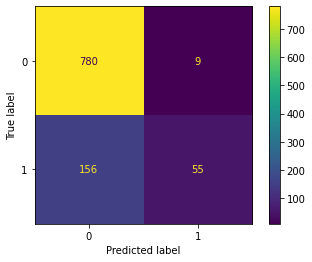

 
 Scenario 19 - n_estimators: 50, learning_rate: 0.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


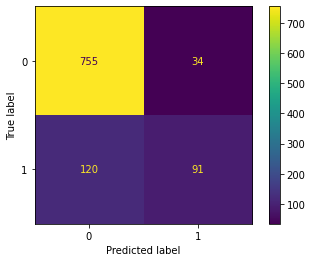

 
 Scenario 20 - n_estimators: 50, learning_rate: 0.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


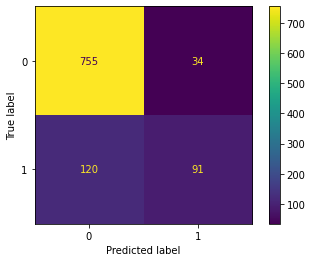

 
 Scenario 21 - n_estimators: 50, learning_rate: 0.6, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


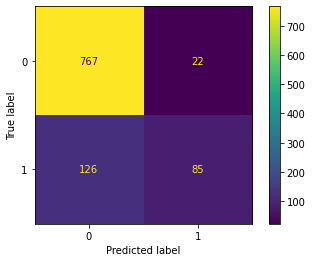

 
 Scenario 22 - n_estimators: 50, learning_rate: 0.6, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


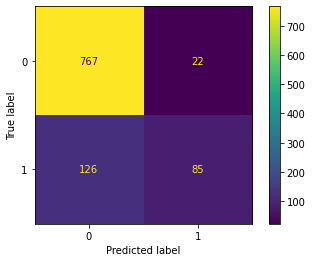

 
 Scenario 23 - n_estimators: 50, learning_rate: 0.6, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


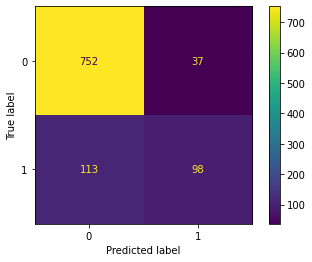

 
 Scenario 24 - n_estimators: 50, learning_rate: 0.6, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


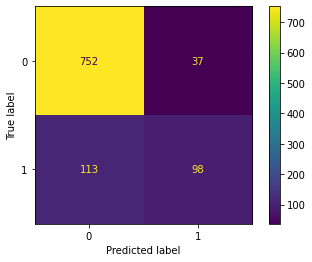

 
 Scenario 25 - n_estimators: 50, learning_rate: 0.7, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


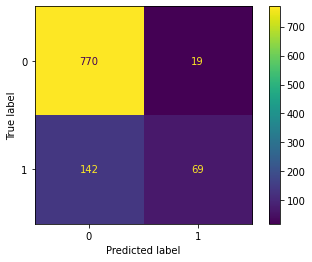

 
 Scenario 26 - n_estimators: 50, learning_rate: 0.7, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


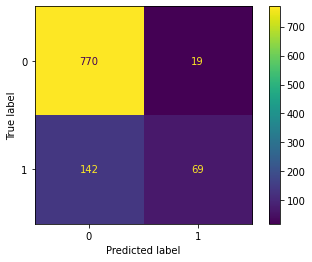

 
 Scenario 27 - n_estimators: 50, learning_rate: 0.7, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


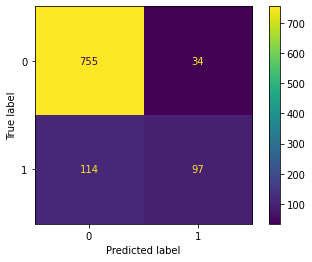

 
 Scenario 28 - n_estimators: 50, learning_rate: 0.7, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


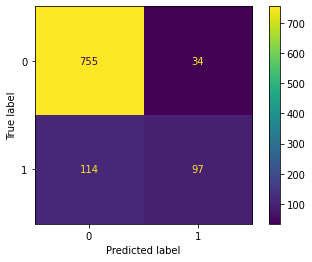

 
 Scenario 29 - n_estimators: 50, learning_rate: 0.8, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


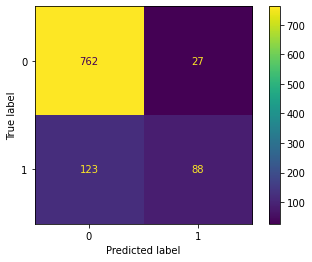

 
 Scenario 30 - n_estimators: 50, learning_rate: 0.8, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


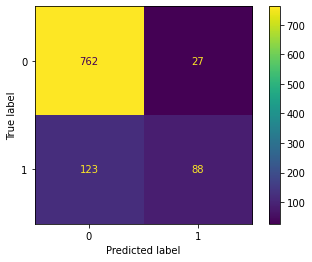

 
 Scenario 31 - n_estimators: 50, learning_rate: 0.8, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


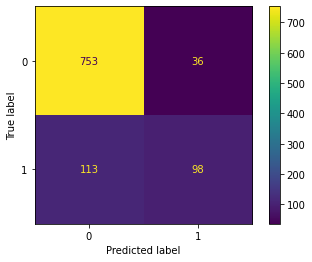

 
 Scenario 32 - n_estimators: 50, learning_rate: 0.8, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


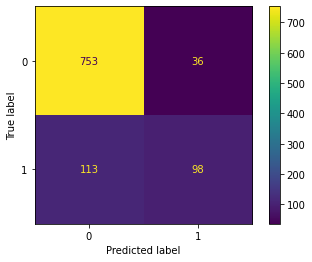

 
 Scenario 33 - n_estimators: 50, learning_rate: 0.9, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


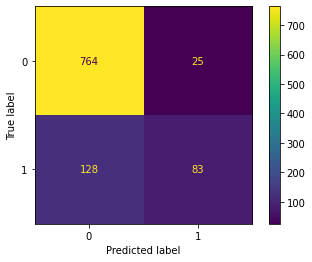

 
 Scenario 34 - n_estimators: 50, learning_rate: 0.9, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


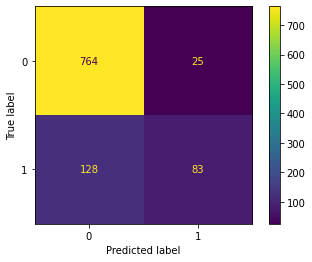

 
 Scenario 35 - n_estimators: 50, learning_rate: 0.9, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


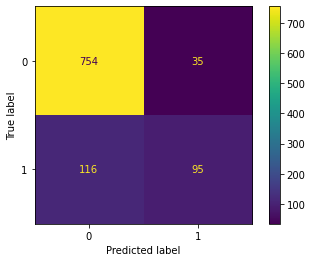

 
 Scenario 36 - n_estimators: 50, learning_rate: 0.9, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


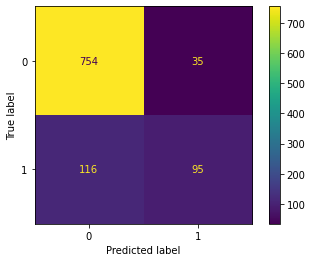

 
 Scenario 37 - n_estimators: 50, learning_rate: 1.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


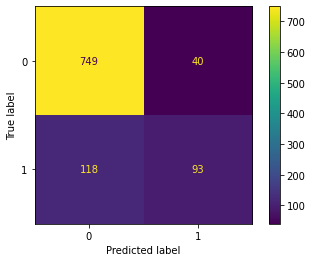

 
 Scenario 38 - n_estimators: 50, learning_rate: 1.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


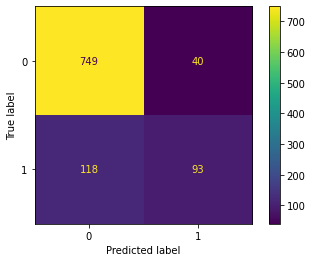

 
 Scenario 39 - n_estimators: 50, learning_rate: 1.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


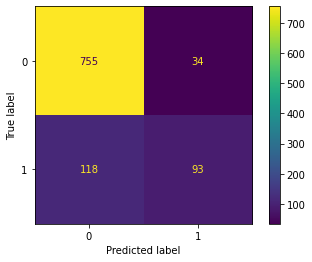

 
 Scenario 40 - n_estimators: 50, learning_rate: 1.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


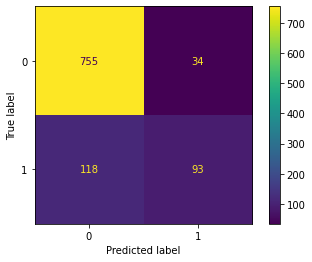

 
 Scenario 41 - n_estimators: 50, learning_rate: 1.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


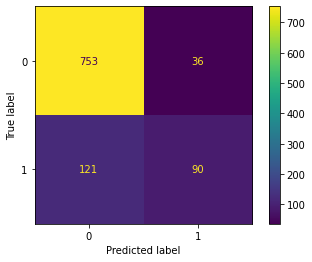

 
 Scenario 42 - n_estimators: 50, learning_rate: 1.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


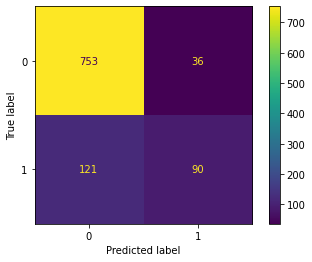

 
 Scenario 43 - n_estimators: 50, learning_rate: 1.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


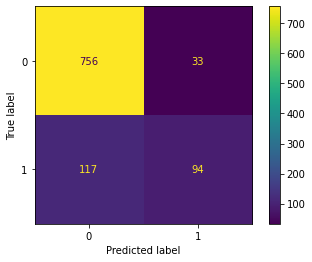

 
 Scenario 44 - n_estimators: 50, learning_rate: 1.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


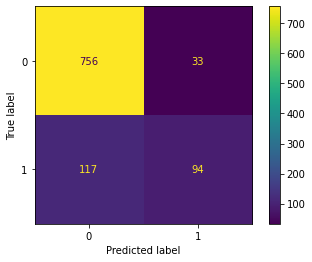

 
 Scenario 45 - n_estimators: 50, learning_rate: 2.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


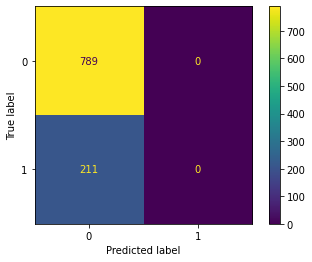

 
 Scenario 46 - n_estimators: 50, learning_rate: 2.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


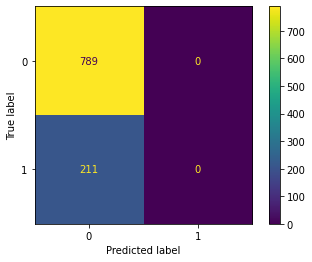

 
 Scenario 47 - n_estimators: 50, learning_rate: 2.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


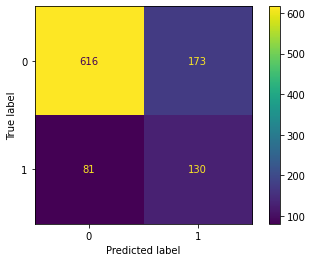

 
 Scenario 48 - n_estimators: 50, learning_rate: 2.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


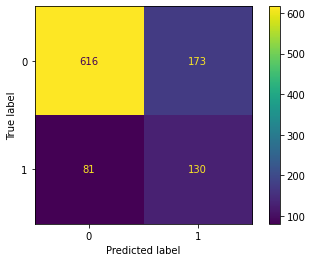

 
 Scenario 49 - n_estimators: 100, learning_rate: 0.1, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 80.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


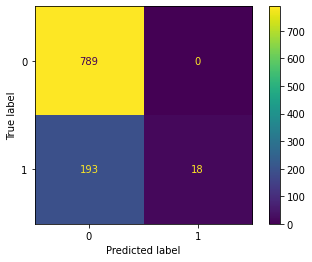

 
 Scenario 50 - n_estimators: 100, learning_rate: 0.1, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 80.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


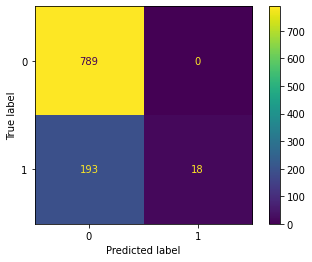

 
 Scenario 51 - n_estimators: 100, learning_rate: 0.1, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


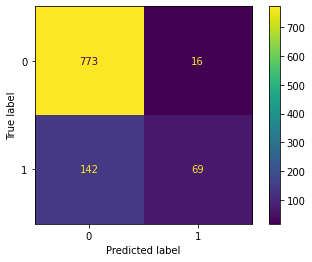

 
 Scenario 52 - n_estimators: 100, learning_rate: 0.1, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


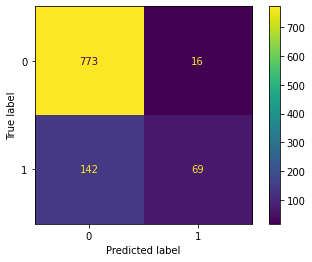

 
 Scenario 53 - n_estimators: 100, learning_rate: 0.2, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 82.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


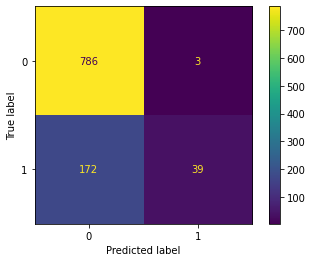

 
 Scenario 54 - n_estimators: 100, learning_rate: 0.2, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 82.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


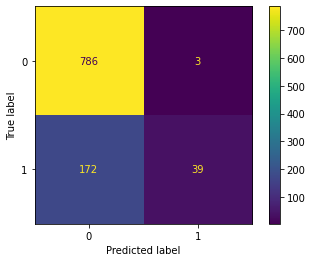

 
 Scenario 55 - n_estimators: 100, learning_rate: 0.2, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


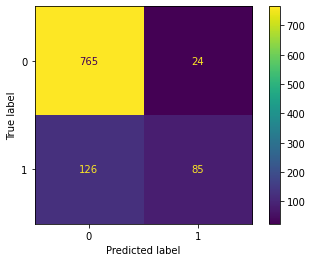

 
 Scenario 56 - n_estimators: 100, learning_rate: 0.2, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


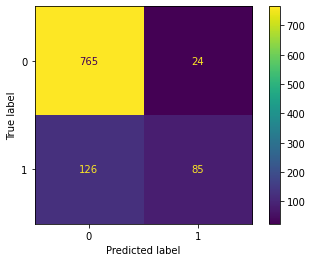

 
 Scenario 57 - n_estimators: 100, learning_rate: 0.3, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


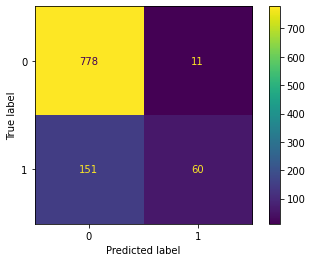

 
 Scenario 58 - n_estimators: 100, learning_rate: 0.3, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


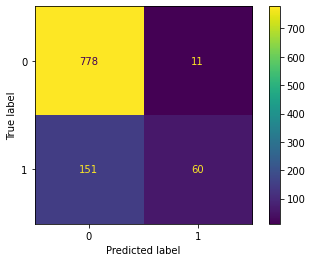

 
 Scenario 59 - n_estimators: 100, learning_rate: 0.3, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


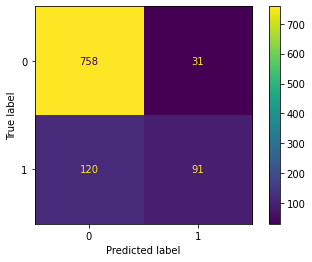

 
 Scenario 60 - n_estimators: 100, learning_rate: 0.3, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


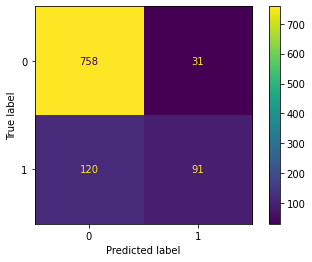

 
 Scenario 61 - n_estimators: 100, learning_rate: 0.4, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


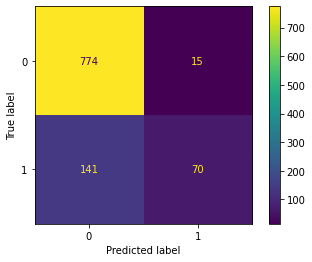

 
 Scenario 62 - n_estimators: 100, learning_rate: 0.4, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


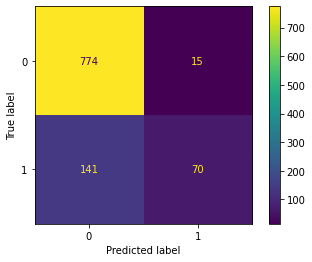

 
 Scenario 63 - n_estimators: 100, learning_rate: 0.4, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


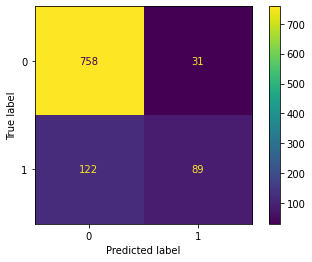

 
 Scenario 64 - n_estimators: 100, learning_rate: 0.4, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


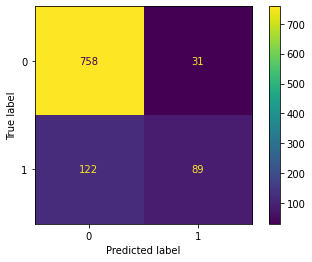

 
 Scenario 65 - n_estimators: 100, learning_rate: 0.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


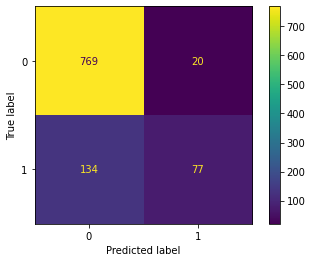

 
 Scenario 66 - n_estimators: 100, learning_rate: 0.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


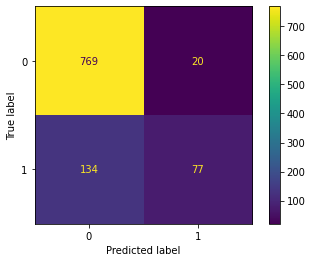

 
 Scenario 67 - n_estimators: 100, learning_rate: 0.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


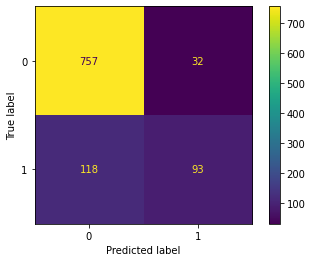

 
 Scenario 68 - n_estimators: 100, learning_rate: 0.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


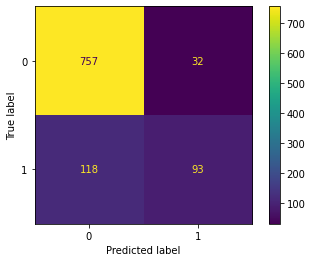

 
 Scenario 69 - n_estimators: 100, learning_rate: 0.6, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


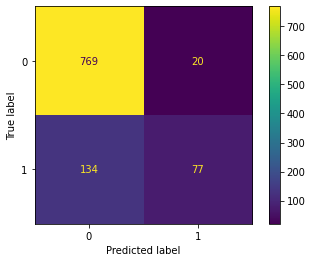

 
 Scenario 70 - n_estimators: 100, learning_rate: 0.6, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


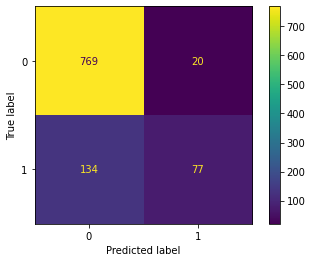

 
 Scenario 71 - n_estimators: 100, learning_rate: 0.6, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


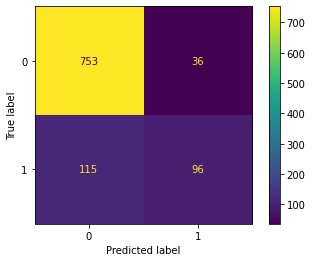

 
 Scenario 72 - n_estimators: 100, learning_rate: 0.6, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


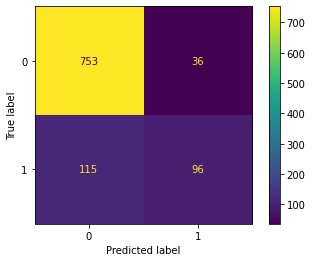

 
 Scenario 73 - n_estimators: 100, learning_rate: 0.7, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


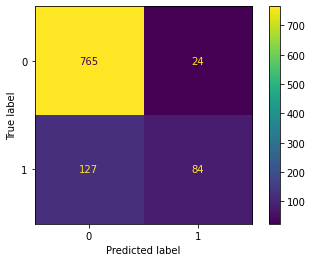

 
 Scenario 74 - n_estimators: 100, learning_rate: 0.7, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


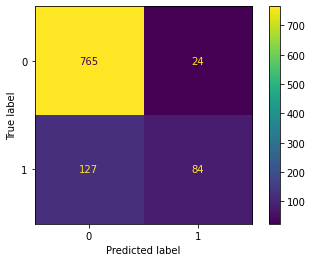

 
 Scenario 75 - n_estimators: 100, learning_rate: 0.7, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


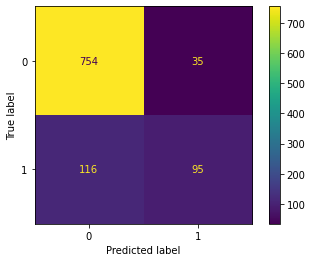

 
 Scenario 76 - n_estimators: 100, learning_rate: 0.7, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


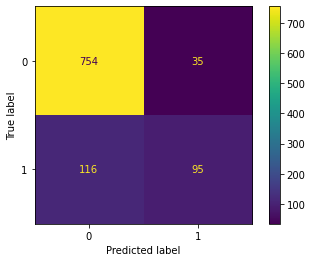

 
 Scenario 77 - n_estimators: 100, learning_rate: 0.8, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


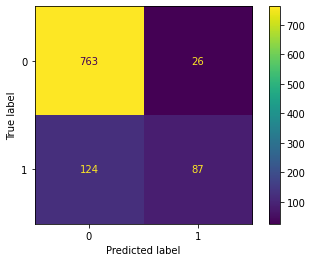

 
 Scenario 78 - n_estimators: 100, learning_rate: 0.8, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


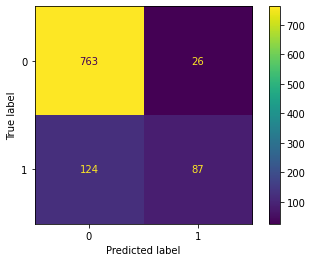

 
 Scenario 79 - n_estimators: 100, learning_rate: 0.8, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


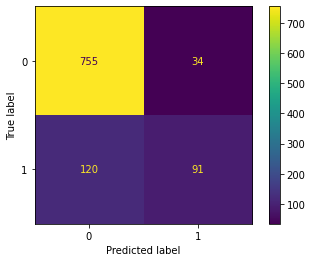

 
 Scenario 80 - n_estimators: 100, learning_rate: 0.8, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


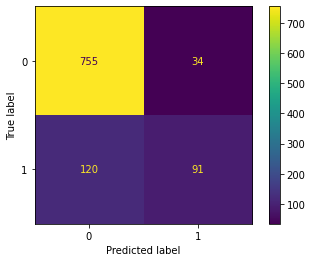

 
 Scenario 81 - n_estimators: 100, learning_rate: 0.9, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


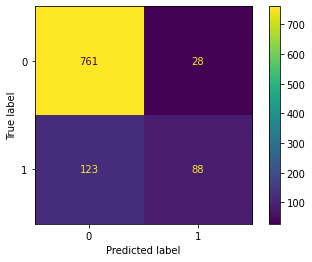

 
 Scenario 82 - n_estimators: 100, learning_rate: 0.9, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


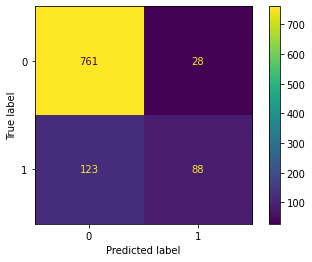

 
 Scenario 83 - n_estimators: 100, learning_rate: 0.9, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


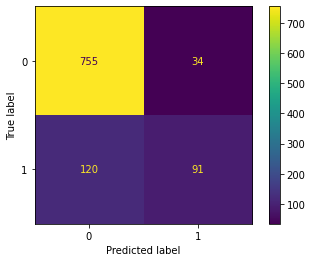

 
 Scenario 84 - n_estimators: 100, learning_rate: 0.9, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


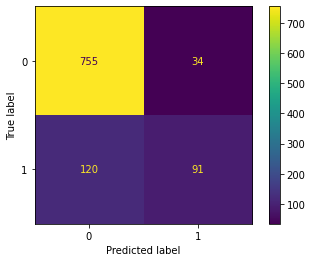

 
 Scenario 85 - n_estimators: 100, learning_rate: 1.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


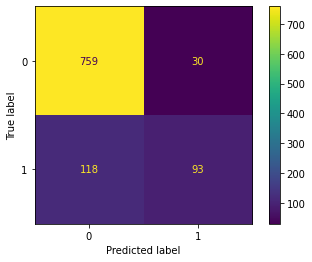

 
 Scenario 86 - n_estimators: 100, learning_rate: 1.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


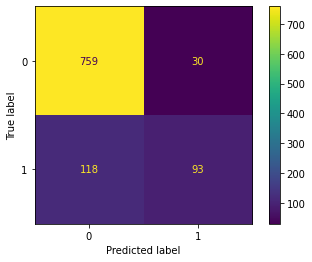

 
 Scenario 87 - n_estimators: 100, learning_rate: 1.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


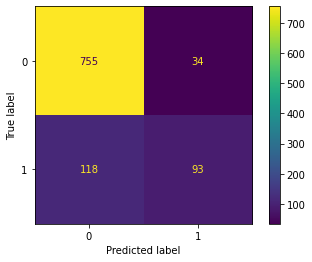

 
 Scenario 88 - n_estimators: 100, learning_rate: 1.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


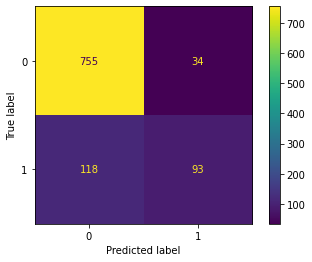

 
 Scenario 89 - n_estimators: 100, learning_rate: 1.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


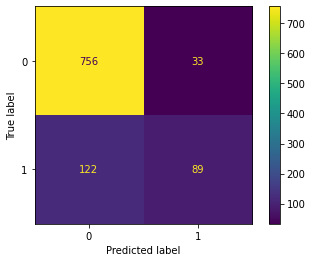

 
 Scenario 90 - n_estimators: 100, learning_rate: 1.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


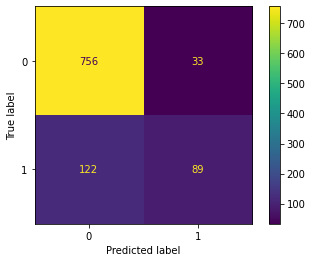

 
 Scenario 91 - n_estimators: 100, learning_rate: 1.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


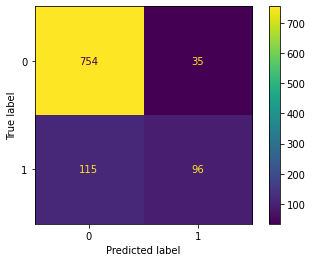

 
 Scenario 92 - n_estimators: 100, learning_rate: 1.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


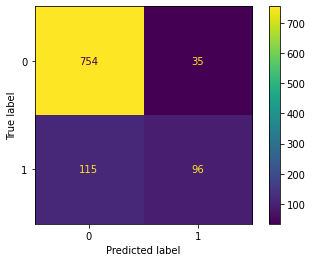

 
 Scenario 93 - n_estimators: 100, learning_rate: 2.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


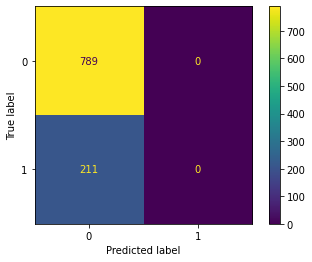

 
 Scenario 94 - n_estimators: 100, learning_rate: 2.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


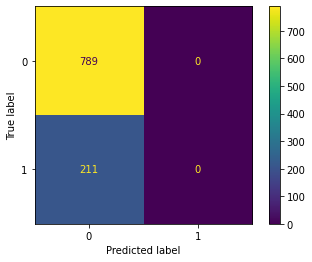

 
 Scenario 95 - n_estimators: 100, learning_rate: 2.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


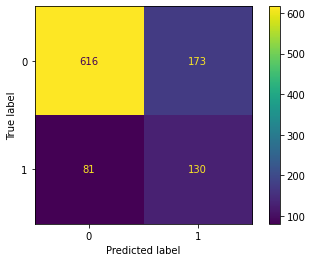

 
 Scenario 96 - n_estimators: 100, learning_rate: 2.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


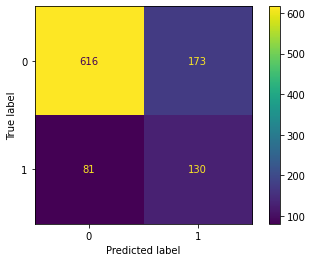

 
 Scenario 97 - n_estimators: 150, learning_rate: 0.1, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 80.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


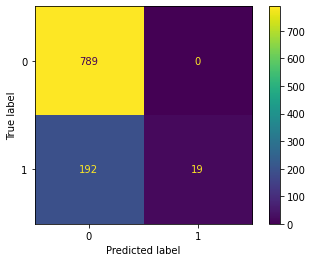

 
 Scenario 98 - n_estimators: 150, learning_rate: 0.1, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 80.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


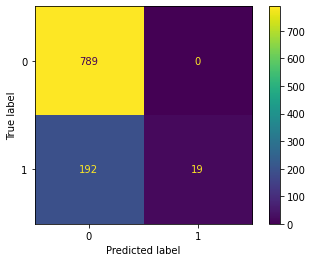

 
 Scenario 99 - n_estimators: 150, learning_rate: 0.1, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


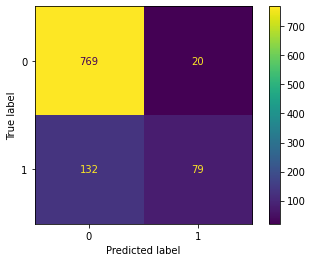

 
 Scenario 100 - n_estimators: 150, learning_rate: 0.1, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


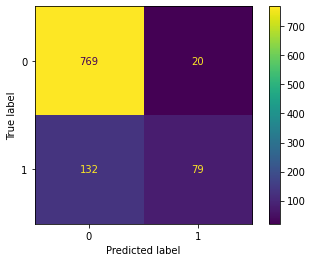

 
 Scenario 101 - n_estimators: 150, learning_rate: 0.2, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 82.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


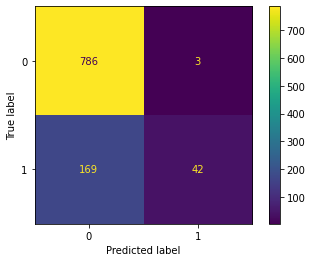

 
 Scenario 102 - n_estimators: 150, learning_rate: 0.2, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 82.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


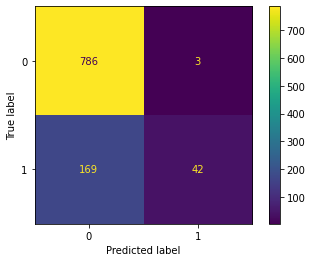

 
 Scenario 103 - n_estimators: 150, learning_rate: 0.2, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


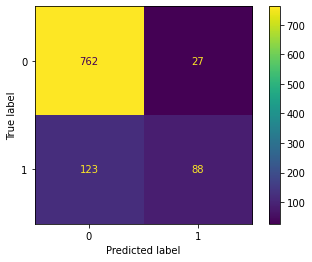

 
 Scenario 104 - n_estimators: 150, learning_rate: 0.2, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


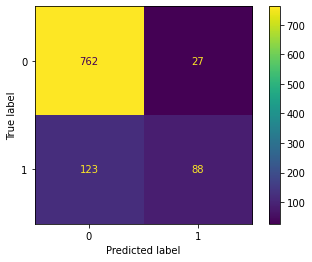

 
 Scenario 105 - n_estimators: 150, learning_rate: 0.3, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


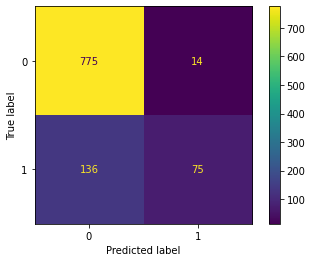

 
 Scenario 106 - n_estimators: 150, learning_rate: 0.3, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


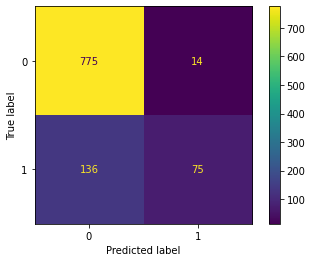

 
 Scenario 107 - n_estimators: 150, learning_rate: 0.3, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


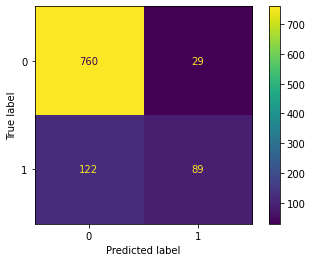

 
 Scenario 108 - n_estimators: 150, learning_rate: 0.3, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


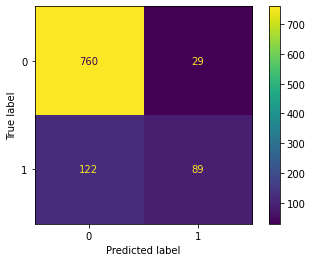

 
 Scenario 109 - n_estimators: 150, learning_rate: 0.4, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


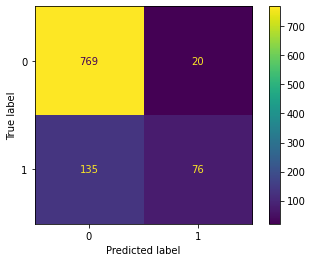

 
 Scenario 110 - n_estimators: 150, learning_rate: 0.4, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


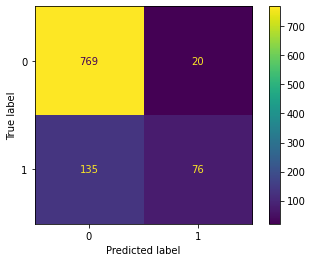

 
 Scenario 111 - n_estimators: 150, learning_rate: 0.4, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


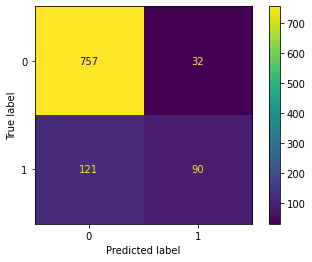

 
 Scenario 112 - n_estimators: 150, learning_rate: 0.4, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


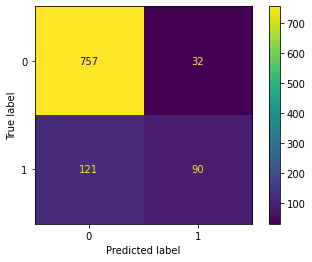

 
 Scenario 113 - n_estimators: 150, learning_rate: 0.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


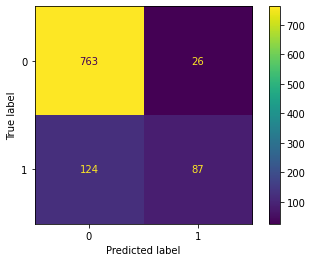

 
 Scenario 114 - n_estimators: 150, learning_rate: 0.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


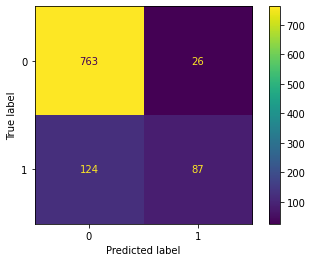

 
 Scenario 115 - n_estimators: 150, learning_rate: 0.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


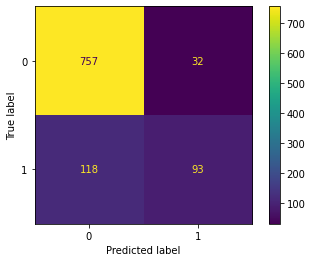

 
 Scenario 116 - n_estimators: 150, learning_rate: 0.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


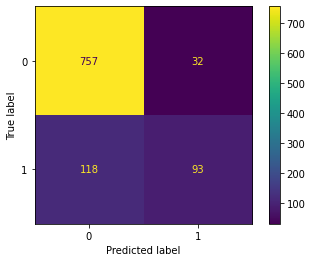

 
 Scenario 117 - n_estimators: 150, learning_rate: 0.6, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


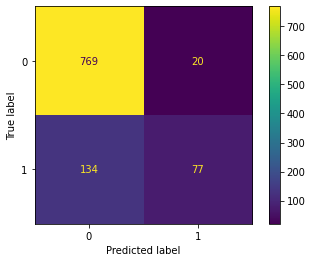

 
 Scenario 118 - n_estimators: 150, learning_rate: 0.6, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


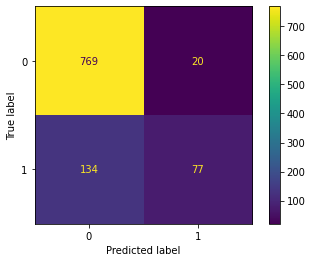

 
 Scenario 119 - n_estimators: 150, learning_rate: 0.6, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


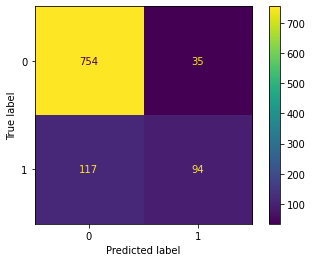

 
 Scenario 120 - n_estimators: 150, learning_rate: 0.6, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


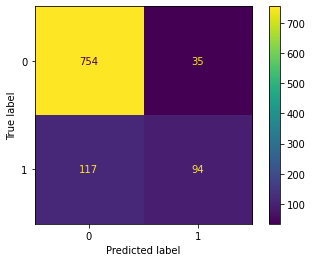

 
 Scenario 121 - n_estimators: 150, learning_rate: 0.7, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


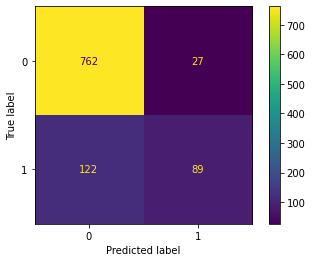

 
 Scenario 122 - n_estimators: 150, learning_rate: 0.7, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


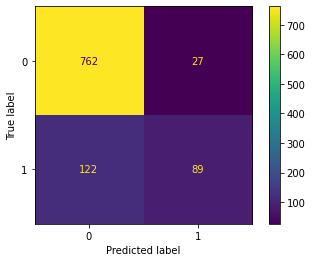

 
 Scenario 123 - n_estimators: 150, learning_rate: 0.7, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


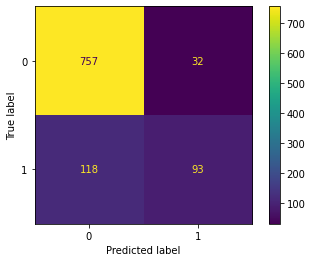

 
 Scenario 124 - n_estimators: 150, learning_rate: 0.7, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


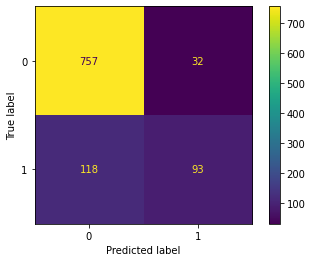

 
 Scenario 125 - n_estimators: 150, learning_rate: 0.8, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


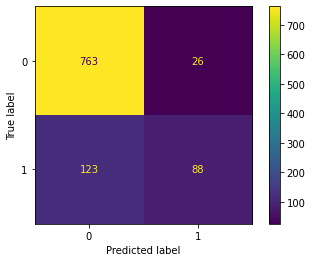

 
 Scenario 126 - n_estimators: 150, learning_rate: 0.8, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


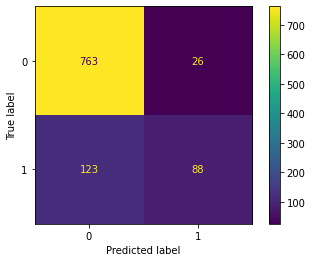

 
 Scenario 127 - n_estimators: 150, learning_rate: 0.8, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


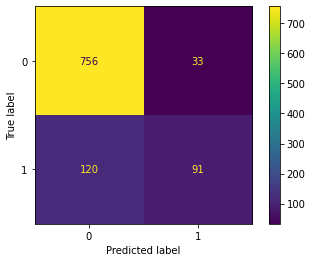

 
 Scenario 128 - n_estimators: 150, learning_rate: 0.8, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


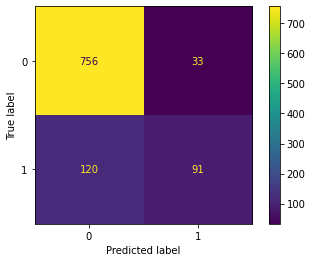

 
 Scenario 129 - n_estimators: 150, learning_rate: 0.9, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


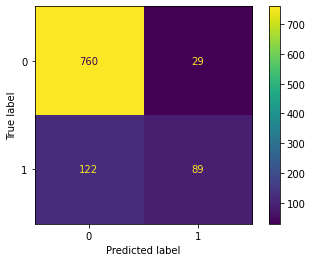

 
 Scenario 130 - n_estimators: 150, learning_rate: 0.9, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


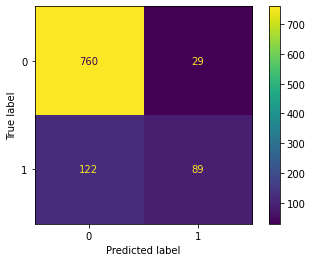

 
 Scenario 131 - n_estimators: 150, learning_rate: 0.9, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


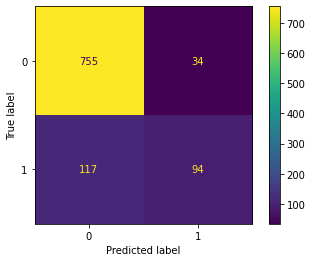

 
 Scenario 132 - n_estimators: 150, learning_rate: 0.9, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


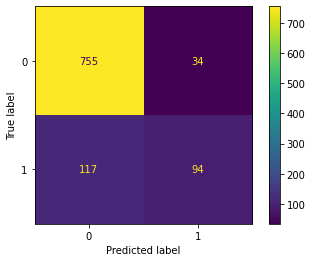

 
 Scenario 133 - n_estimators: 150, learning_rate: 1.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


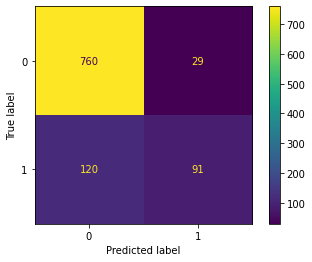

 
 Scenario 134 - n_estimators: 150, learning_rate: 1.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


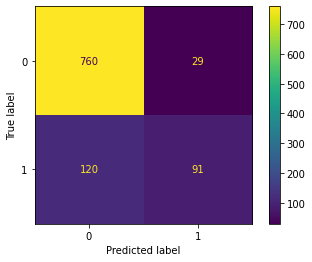

 
 Scenario 135 - n_estimators: 150, learning_rate: 1.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


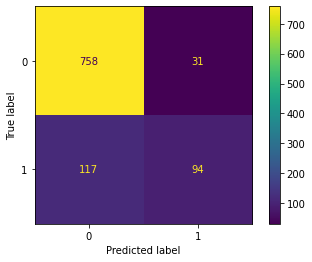

 
 Scenario 136 - n_estimators: 150, learning_rate: 1.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


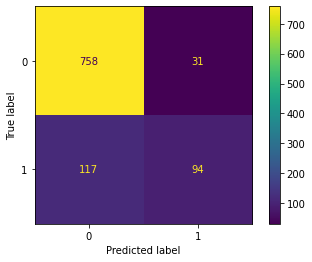

 
 Scenario 137 - n_estimators: 150, learning_rate: 1.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


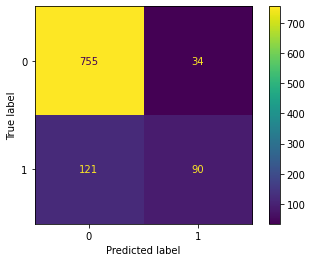

 
 Scenario 138 - n_estimators: 150, learning_rate: 1.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


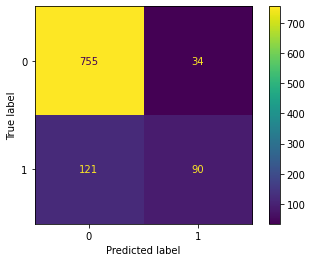

 
 Scenario 139 - n_estimators: 150, learning_rate: 1.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


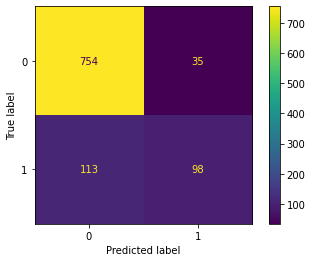

 
 Scenario 140 - n_estimators: 150, learning_rate: 1.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


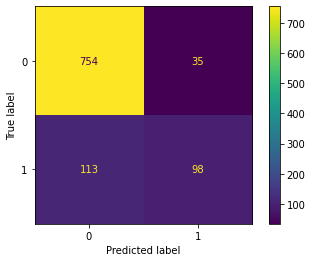

 
 Scenario 141 - n_estimators: 150, learning_rate: 2.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


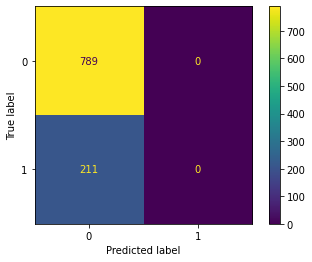

 
 Scenario 142 - n_estimators: 150, learning_rate: 2.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


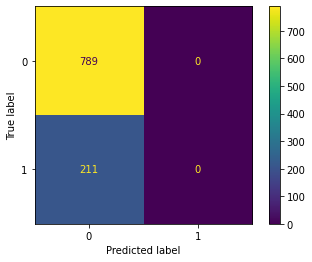

 
 Scenario 143 - n_estimators: 150, learning_rate: 2.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


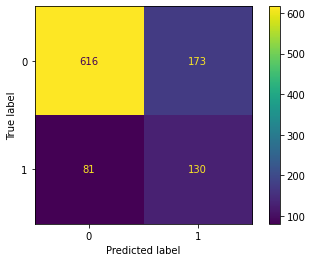

 
 Scenario 144 - n_estimators: 150, learning_rate: 2.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


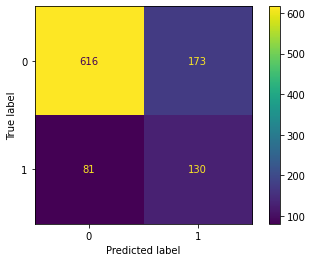

 
 Scenario 145 - n_estimators: 200, learning_rate: 0.1, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 82.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


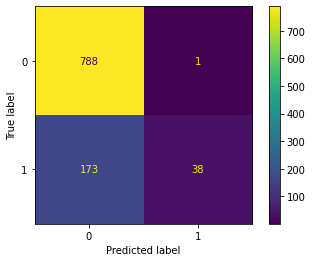

 
 Scenario 146 - n_estimators: 200, learning_rate: 0.1, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 82.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


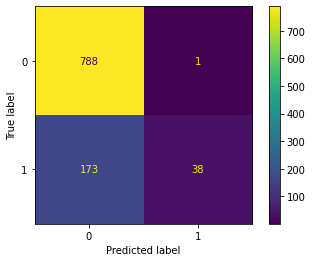

 
 Scenario 147 - n_estimators: 200, learning_rate: 0.1, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


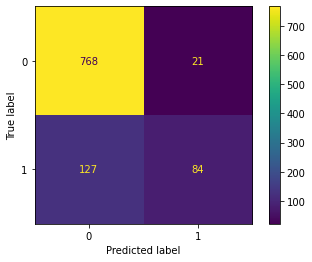

 
 Scenario 148 - n_estimators: 200, learning_rate: 0.1, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


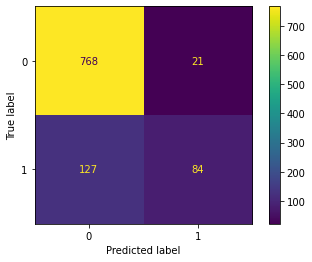

 
 Scenario 149 - n_estimators: 200, learning_rate: 0.2, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


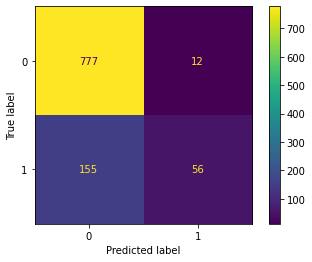

 
 Scenario 150 - n_estimators: 200, learning_rate: 0.2, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


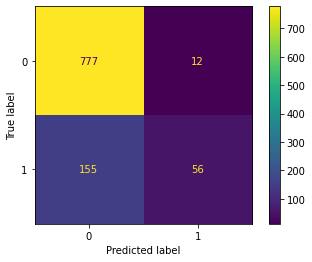

 
 Scenario 151 - n_estimators: 200, learning_rate: 0.2, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


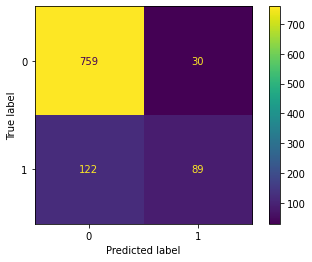

 
 Scenario 152 - n_estimators: 200, learning_rate: 0.2, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


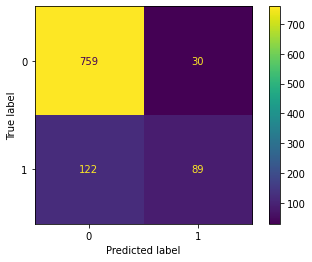

 
 Scenario 153 - n_estimators: 200, learning_rate: 0.3, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 83.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


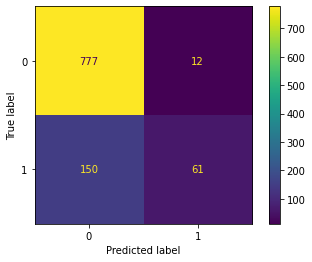

 
 Scenario 154 - n_estimators: 200, learning_rate: 0.3, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 83.8%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


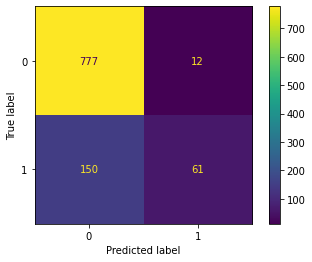

 
 Scenario 155 - n_estimators: 200, learning_rate: 0.3, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


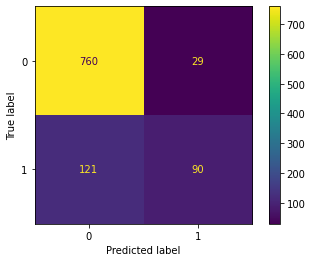

 
 Scenario 156 - n_estimators: 200, learning_rate: 0.3, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


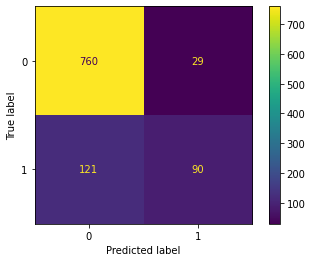

 
 Scenario 157 - n_estimators: 200, learning_rate: 0.4, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


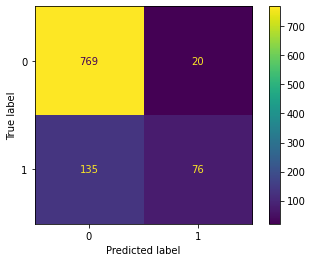

 
 Scenario 158 - n_estimators: 200, learning_rate: 0.4, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.5%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


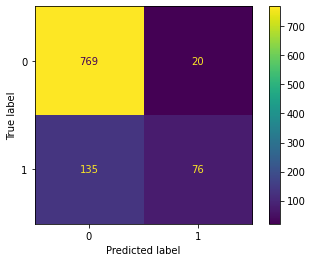

 
 Scenario 159 - n_estimators: 200, learning_rate: 0.4, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


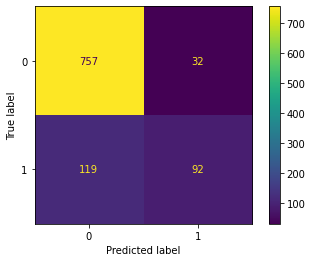

 
 Scenario 160 - n_estimators: 200, learning_rate: 0.4, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


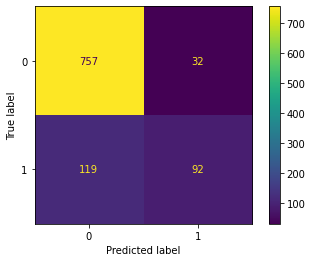

 
 Scenario 161 - n_estimators: 200, learning_rate: 0.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


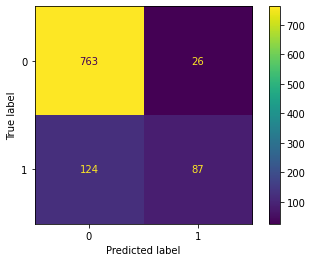

 
 Scenario 162 - n_estimators: 200, learning_rate: 0.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.0%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


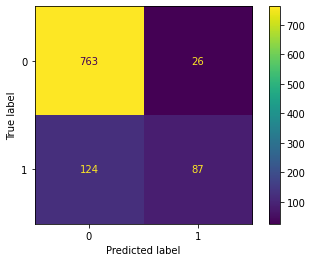

 
 Scenario 163 - n_estimators: 200, learning_rate: 0.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


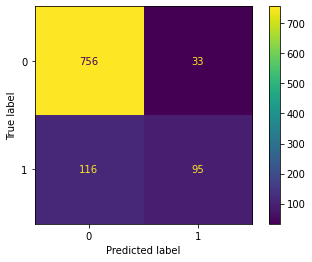

 
 Scenario 164 - n_estimators: 200, learning_rate: 0.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


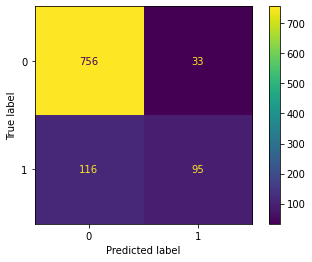

 
 Scenario 165 - n_estimators: 200, learning_rate: 0.6, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


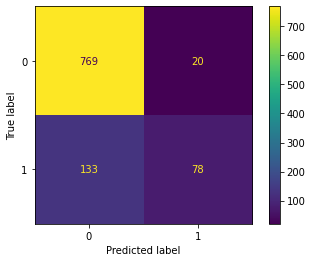

 
 Scenario 166 - n_estimators: 200, learning_rate: 0.6, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


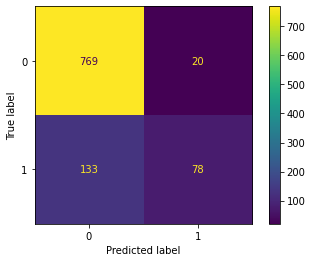

 
 Scenario 167 - n_estimators: 200, learning_rate: 0.6, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


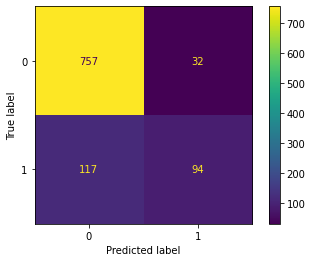

 
 Scenario 168 - n_estimators: 200, learning_rate: 0.6, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


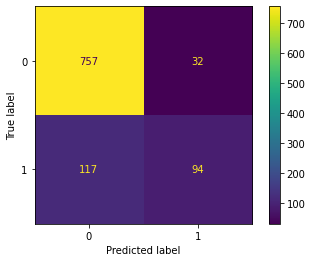

 
 Scenario 169 - n_estimators: 200, learning_rate: 0.7, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


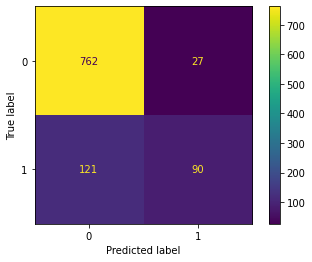

 
 Scenario 170 - n_estimators: 200, learning_rate: 0.7, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


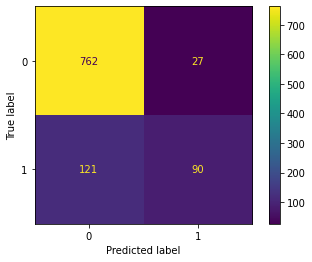

 
 Scenario 171 - n_estimators: 200, learning_rate: 0.7, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


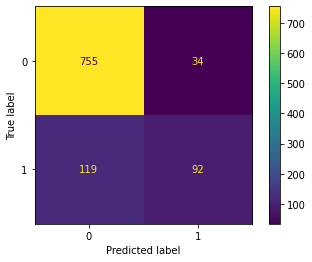

 
 Scenario 172 - n_estimators: 200, learning_rate: 0.7, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


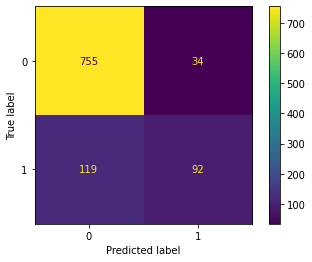

 
 Scenario 173 - n_estimators: 200, learning_rate: 0.8, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


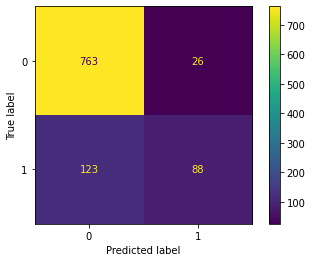

 
 Scenario 174 - n_estimators: 200, learning_rate: 0.8, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.1%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


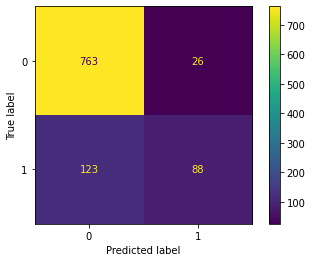

 
 Scenario 175 - n_estimators: 200, learning_rate: 0.8, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


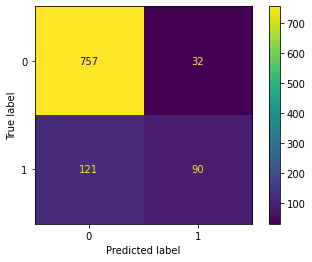

 
 Scenario 176 - n_estimators: 200, learning_rate: 0.8, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.7%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


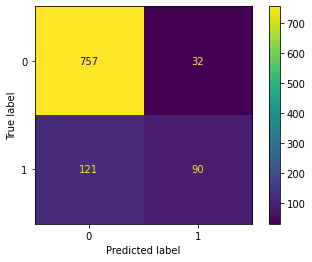

 
 Scenario 177 - n_estimators: 200, learning_rate: 0.9, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


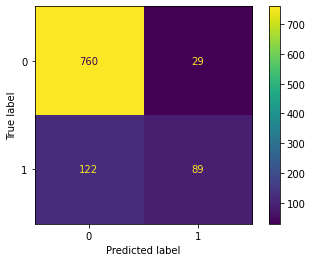

 
 Scenario 178 - n_estimators: 200, learning_rate: 0.9, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


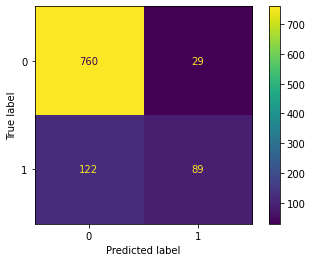

 
 Scenario 179 - n_estimators: 200, learning_rate: 0.9, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


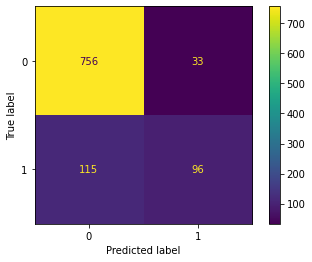

 
 Scenario 180 - n_estimators: 200, learning_rate: 0.9, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


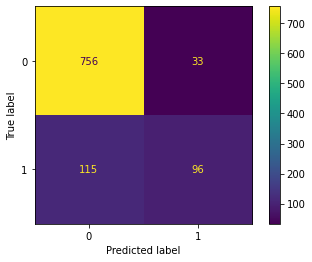

 
 Scenario 181 - n_estimators: 200, learning_rate: 1.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


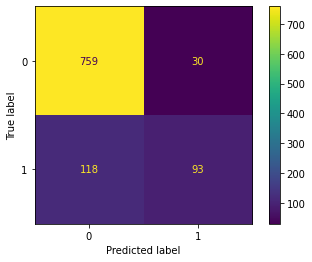

 
 Scenario 182 - n_estimators: 200, learning_rate: 1.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


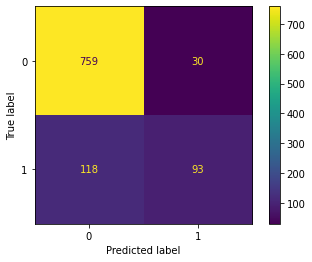

 
 Scenario 183 - n_estimators: 200, learning_rate: 1.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


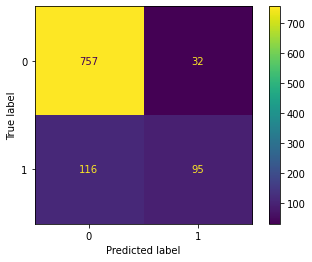

 
 Scenario 184 - n_estimators: 200, learning_rate: 1.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.2%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


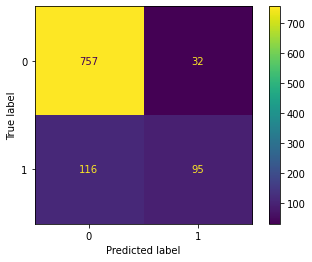

 
 Scenario 185 - n_estimators: 200, learning_rate: 1.5, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


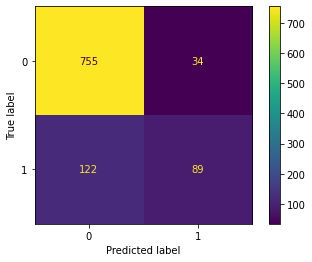

 
 Scenario 186 - n_estimators: 200, learning_rate: 1.5, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 84.4%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


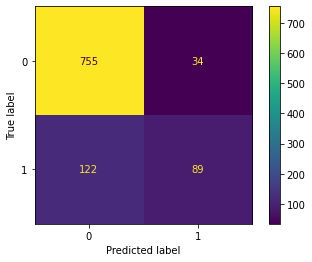

 
 Scenario 187 - n_estimators: 200, learning_rate: 1.5, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 85.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


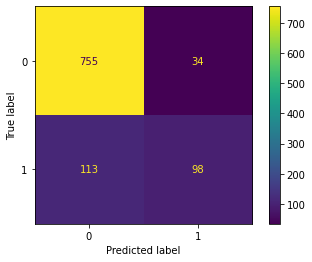

 
 Scenario 188 - n_estimators: 200, learning_rate: 1.5, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 85.3%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


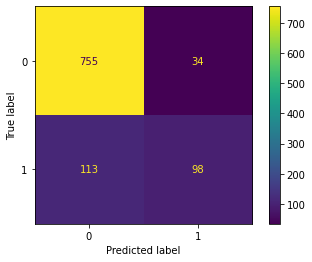

 
 Scenario 189 - n_estimators: 200, learning_rate: 2.0, algorithm: SAMME, random_state: None, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


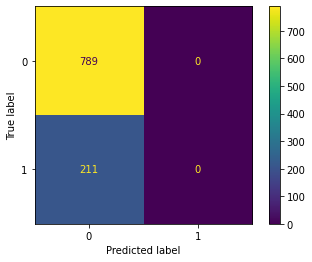

 
 Scenario 190 - n_estimators: 200, learning_rate: 2.0, algorithm: SAMME, random_state: 10, 
 Adaptive Boost Classification Accuracy: 78.9%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


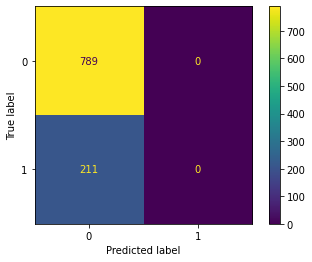

 
 Scenario 191 - n_estimators: 200, learning_rate: 2.0, algorithm: SAMME.R, random_state: None, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


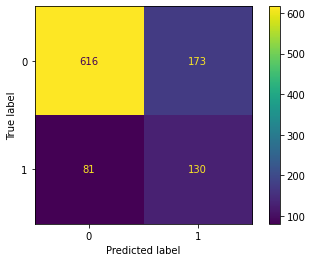

 
 Scenario 192 - n_estimators: 200, learning_rate: 2.0, algorithm: SAMME.R, random_state: 10, 
 Adaptive Boost Classification Accuracy: 74.6%, Adaptive Boost Classification F1-Score: 55.03%, Adaptive Boost Classification Precision: 73.23%, 
 Adaptive Boost Classification Recall: 44.08%, Adaptive Boost classification ROC AUC Score: 69.88%


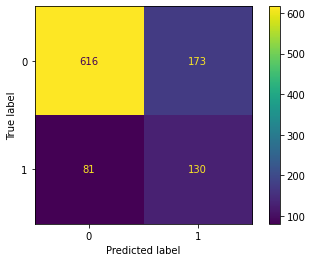

Model Tuning Execution Completed


In [80]:
# Method

# Creating an Empty Pandas DataFrame to Hold the Tuned Model Results for various combinations of the Hyper-Parameters
ada_boost_tune_model_df_final = pd.DataFrame()

# Setting the Values of the Hyper-Parameters to be used for Tuning the AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1, criterion='gini')
n_estimators = [50, 100, 150, 200]                                                     #p1
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]           #p2
algorithm = ['SAMME', 'SAMME.R']                                                       #p3
random_state = [None, 10]                                                              #p4
      
scenario_id = 0

# Creating a For Loop to Tune the AdaBoostClassifier Model for the Various Combinations of the Hyper-Parameters

for p1, p2, p3, p4 in product(n_estimators, learning_rate, algorithm, random_state):
    
    # Defining the AdaBoostClassifier Model with its Hyper-Parameters
    ada_boost_tune_model = AdaBoostClassifier(base_estimator=base_estimator,
                                             n_estimators=p1,
                                             learning_rate=p2,
                                             algorithm=p3,
                                             random_state=p4)
    
    # Fitting and Training the AdaBoostClassifier Model based on its Hyper-Parameters
    ada_boost_tune_model.fit(X_train, y_train)
    
    # Predicting the Classifier on the Validation Data
    y_validate_tune_pred = ada_boost_tune_model.predict(X_validate)
    
    # Calculating the Accuracy
    accuracy_ada_boost_churn_tune = round((accuracy_score(y_validate, y_validate_tune_pred))*100, 2)
    
    # F1-score
    f1_score_ada_boost_churn_tune = round((f1_score(y_validate, y_validate_pred)*100), 2)

    # Precision
    precision_ada_boost_churn_tune = round((precision_score(y_validate, y_validate_pred)*100), 2)

    # Recall
    recall_ada_boost_churn_tune = round((recall_score(y_validate, y_validate_pred)*100), 2)
    
    # ROC AUC Score
    roc_auc_score_ada_boost_churn_tune = round((roc_auc_score(y_validate, y_validate_pred)*100), 2)
    
    # Incrementing the Scenario_ID for Tracking
    scenario_id += 1
    
    # Displaying the Accuracy Metrics for the Various Combinations of the Hyper-Parameters Tuning
    print(" \n Scenario {} - n_estimators: {}, learning_rate: {}, algorithm: {}, random_state: {}, \n Adaptive Boost Classification Accuracy: {}%, Adaptive Boost Classification F1-Score: {}%, Adaptive Boost Classification Precision: {}%, \n Adaptive Boost Classification Recall: {}%, Adaptive Boost classification ROC AUC Score: {}%".format(scenario_id, p1, p2, p3, p4, accuracy_ada_boost_churn_tune, f1_score_ada_boost_churn_tune, precision_ada_boost_churn_tune, recall_ada_boost_churn_tune, roc_auc_score_ada_boost_churn_tune))
    
    # Defining the Instance of Confusion Matrix
    plot_confusion_matrix(ada_boost_tune_model, X_validate, y_validate)  
    plt.show()
    #title = "Confusion Matrix {} - n_estimators: {}, learning_rate: {}, algorithm: {}, random_state: {}, Adaptive Boost Classification Accuracy: {}%, Adaptive Boost Classification F1-Score: {}%, Adaptive Boost Classification Precision: {}%, Adaptive Boost Classification Recall: {}%, Adaptive Boost classification ROC AUC Score: {}%".format(scenario_id, p1, p2, p3, p4, accuracy_ada_boost_churn_tune, f1_score_ada_boost_churn_tune, precision_ada_boost_churn_tune, recall_ada_boost_churn_tune, roc_auc_score_ada_boost_churn_tune)
    
    # Defining a Individual DataFrame to Hold the Hyper-Parameters Values and their Corresponding Accuracy and ROC AUC Scores
    ada_boost_tune_model_df = pd.DataFrame({'scenario_id': [scenario_id], 'n_estimators': [p1], 'learning_rate': [p2], 'ada boost algorithm': [p3], 'random_state': [p4], 'Accuracy': [accuracy_ada_boost_churn_tune], 'F1-Score': [f1_score_ada_boost_churn_tune], 'Precision': [precision_ada_boost_churn_tune], 'Recall': [recall_ada_boost_churn_tune], 'ROC_AUC_Score': [roc_auc_score_ada_boost_churn_tune]})
    
    # Concatenating the Individual Results DataFrame with the Final DataFrame
    ada_boost_tune_model_df_final = pd.concat([ada_boost_tune_model_df_final, ada_boost_tune_model_df], axis=0, ignore_index=True)
    
# Sorting the Final DataFrame Based on the Increasing Value of Accuracy
ada_boost_tune_model_df_final_sorted = ada_boost_tune_model_df_final.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
    
print(ada_boost_tune_model_df_final_sorted)

print("Model Tuning Execution Completed")    

In [86]:
# Displaying the Various Tuned Model Results

ada_boost_tune_model_df_final_sorted

     scenario_id  n_estimators  learning_rate ada boost algorithm  \
0             11            50            0.3             SAMME.R   
1             12            50            0.3             SAMME.R   
2            187           200            1.5             SAMME.R   
3            188           200            1.5             SAMME.R   
4            183           200            1.0             SAMME.R   
..           ...           ...            ...                 ...   
187           48            50            2.0             SAMME.R   
188          143           150            2.0             SAMME.R   
189           95           100            2.0             SAMME.R   
190           96           100            2.0             SAMME.R   
191          192           200            2.0             SAMME.R   

    random_state  Accuracy  F1-Score  Precision  Recall  ROC_AUC_Score  
0           None      85.5     55.03      73.23   44.08          69.88  
1             10      85.